### Informações

#### Cids:
- A e B - Algumas doenças infecciosas e parasitárias 
- C - Neoplasias (tumores)
- D - Doenças do sangue e dos órgãos hematopoéticos e alguns transtornos imunitários
- E - Doenças endócrinas, nutricionais e metabólicas
- F - Transtornos mentais e comportamentais 
- G - Doenças do sistema nervoso 
- H - Doenças do olho e anexos e 	Doenças do ouvido e da apófise mastóide
- I - Doenças do aparelho circulatório 
- J - Doenças do aparelho respiratório 
- K - Doenças do aparelho digestivo
- L - Doenças da pele e do tecido subcutâneo 
- M - Doenças do sistema osteomuscular e do tecido conjuntivo 
- N - Doenças do aparelho geniturinário 
- O - Gravidez, parto e puerpério 
- P - Algumas afecções originadas no período perinatal 
- Q - Malformações congênitas, deformidades e anomalias cromossômicas 
- R - Sintomas, sinais e achados anormais de exames clínicos e de laboratório, não classificados em outra parte 
- S - Lesões, envenenamentos e algumas outras conseqüências de causas externas 
- U - Códigos para propósitos especiais 
- V - Causas externas de morbidade e de mortalidade 
- Z - Fatores que exercem influência sobre o estado de saúde e o contato com serviços de saúde 

# 2° Análise Exploratória dos Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
colunas_utilizadas = ['NATURAL', 'DTOBITO','DTNASC','IDADE','SEXO','RACACOR',
                      'ESTCIV','ESC','OCUP', 'DIFDATA', 'CAUSABAS_O','LOCOCOR',
                      'ASSISTMED', 'NECROPSIA','LINHAA','LINHAB','LINHAC', 'LINHAD','LINHAII', 'CAUSABAS']

In [3]:
dframe = pd.read_csv('DO24OPEN.csv', delimiter=';', usecols=colunas_utilizadas)

In [4]:
dframe.head()

,DTOBITO,NATURAL,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,LOCOCOR,ASSISTMED,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,DIFDATA,CAUSABAS_O
0,13022024,835.0,8041939.0,484.0,1,1.0,2.0,4.0,999993.0,3,NaN,NaN,*R99X,*C349,NaN,NaN,NaN,C349,22,C349
1,13022024,815.0,27061956.0,467.0,1,1.0,4.0,4.0,771105.0,3,9.0,1.0,*S069,*W130,NaN,NaN,NaN,W130,22,W130
2,13022024,NaN,7031954.0,469.0,1,1.0,2.0,9.0,998999.0,5,NaN,NaN,*T634,*X238,NaN,NaN,NaN,X238,22,X238
3,13022024,825.0,27121936.0,487.0,1,4.0,5.0,3.0,911305.0,1,NaN,NaN,*J969,*J159,*J449,NaN,*I678*G309,J440,35,J440
4,13022024,852.0,3061951.0,472.0,2,1.0,4.0,2.0,999992.0,1,NaN,NaN,*A419,NaN,*J690,NaN,*N179,J690,35,J690


In [5]:
dframe.shape

(459957, 20)

In [6]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459957 entries, 0 to 459956
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DTOBITO     459957 non-null  int64  
 1   NATURAL     440131 non-null  float64
 2   DTNASC      451226 non-null  float64
 3   IDADE       451892 non-null  float64
 4   SEXO        459957 non-null  int64  
 5   RACACOR     445321 non-null  float64
 6   ESTCIV      432284 non-null  float64
 7   ESC         425843 non-null  float64
 8   OCUP        389934 non-null  float64
 9   LOCOCOR     459957 non-null  int64  
 10  ASSISTMED   317216 non-null  float64
 11  NECROPSIA   327075 non-null  float64
 12  LINHAA      446296 non-null  object 
 13  LINHAB      345916 non-null  object 
 14  LINHAC      212864 non-null  object 
 15  LINHAD      88561 non-null   object 
 16  LINHAII     187574 non-null  object 
 17  CAUSABAS    459957 non-null  object 
 18  DIFDATA     459957 non-null  int64  
 19  CA

In [7]:
dframe.describe().T

,count,mean,std,min,25%,50%,75%,max
DTOBITO,459957.0,1.503316e+07,8.735921e+06,1012024.0,7042024.00,15012024.0,22042024.0,31032024.0
NATURAL,440131.0,8.248350e+02,6.897971e+01,2.0,826.00,831.0,835.0,999.0
DTNASC,451226.0,1.543627e+07,8.721583e+06,1011900.0,8051996.25,15081955.0,23041973.0,31122023.0
IDADE,451892.0,4.629861e+02,4.687366e+01,1.0,456.00,471.0,482.0,999.0
SEXO,459957.0,1.453123e+00,4.993680e-01,0.0,1.00,1.0,2.0,2.0
RACACOR,445321.0,2.284682e+00,1.422840e+00,1.0,1.00,1.0,4.0,5.0
ESTCIV,432284.0,2.507641e+00,1.670626e+00,1.0,1.00,2.0,3.0,9.0
ESC,425843.0,3.446820e+00,2.161780e+00,1.0,2.00,3.0,4.0,9.0
OCUP,389934.0,7.712675e+05,2.692740e+05,10105.0,621005.00,998999.0,999993.0,999994.0
LOCOCOR,459957.0,1.682018e+00,1.097303e+00,1.0,1.00,1.0,3.0,9.0


In [8]:
dframe_local = pd.read_csv('Nacionalidade(Planilha1).csv', encoding="UTF-8", delimiter=';')

In [9]:
dframe_local.head()

,Locais,Cod_locais,Região
0,Brasil,1,América do Sul
1,Argentina,11,América do Sul
2,Bolívia,12,América do Sul
3,Paraguai,13,América do Sul
4,Uruguai,14,América do Sul


In [10]:
dframe_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Locais      65 non-null     object
 1   Cod_locais  65 non-null     int64 
 2   Região      65 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
dframe.isnull().values.any()

True

In [12]:
dframe.isnull().sum()

DTOBITO            0
NATURAL        19826
DTNASC          8731
IDADE           8065
SEXO               0
RACACOR        14636
ESTCIV         27673
ESC            34114
OCUP           70023
LOCOCOR            0
ASSISTMED     142741
NECROPSIA     132882
LINHAA         13661
LINHAB        114041
LINHAC        247093
LINHAD        371396
LINHAII       272383
CAUSABAS           0
DIFDATA            0
CAUSABAS_O       655
dtype: int64

In [13]:
dframe_ocup = pd.read_csv('Ocupacao(Planilha1).csv', encoding="UTF-8", delimiter=',')

In [14]:
dframe_ocup.head()

,Profissao,Codigo
0,Oficial General da Aeronáutica,10105
1,Oficial General do Exército,10110
2,Oficial General da Marinha,10115
3,Oficial da Aeronáutica,10205
4,Oficial do Exército,10210


In [15]:
dframe_ocup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Profissao  2429 non-null   object
 1   Codigo     2429 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.1+ KB


<Axes: >

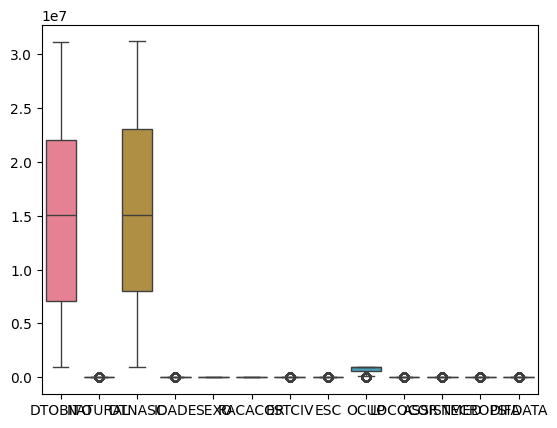

In [16]:
sns.boxplot(dframe)

# 3° Pré-Processamento dos Dados

## Tratamento dos Valores Nulos

In [17]:
percentual_dados_faltantes = (dframe.isnull().sum() / len(dframe))*100
print(percentual_dados_faltantes)

DTOBITO        0.000000
NATURAL        4.310403
DTNASC         1.898221
IDADE          1.753425
SEXO           0.000000
RACACOR        3.182037
ESTCIV         6.016432
ESC            7.416780
OCUP          15.223814
LOCOCOR        0.000000
ASSISTMED     31.033553
NECROPSIA     28.890092
LINHAA         2.970060
LINHAB        24.793839
LINHAC        53.720891
LINHAD        80.745809
LINHAII       59.219231
CAUSABAS       0.000000
DIFDATA        0.000000
CAUSABAS_O     0.142405
dtype: float64


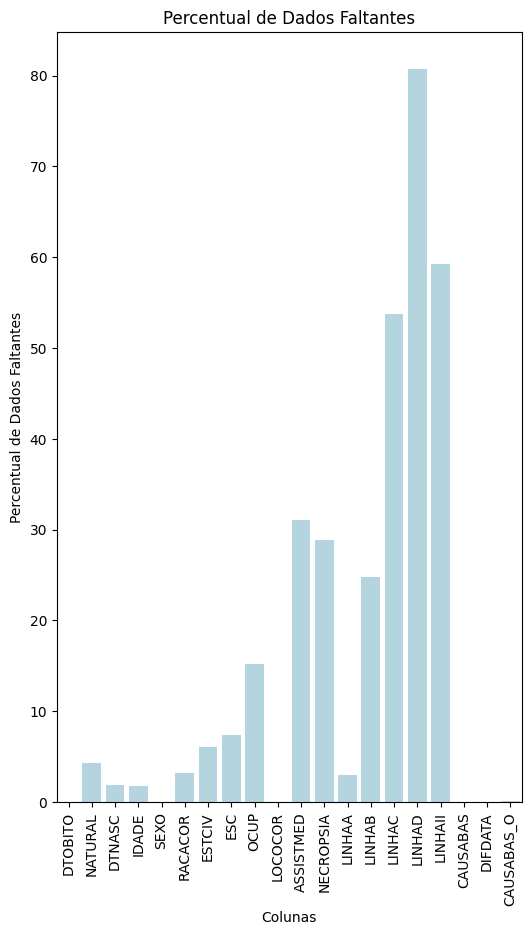

In [18]:
plt.figure(figsize=(6, 10))
sns.barplot(x=percentual_dados_faltantes.index, y=percentual_dados_faltantes.values, color='lightblue')
plt.title('Percentual de Dados Faltantes')
plt.xlabel('Colunas')
plt.ylabel('Percentual de Dados Faltantes')
plt.xticks(rotation=90) # deixa os labels em pé, melhor p ver

plt.show()

Como podemos analisar, há muito valores nulos nessa base de dados

### Calculando a Idade

In [19]:
# Remove as datas de nascimento faltantes e converte para int

dframe = dframe[dframe['DTNASC'].notna()]
dframe['DTNASC'] = dframe['DTNASC'].astype(int)
dframe['DTNASC'].isnull().sum()

0

In [20]:
from datetime import datetime

'''
    Função para converter a data, que se encontra no tipo INT.
    Recebe os valores da coluna DTNASC e DTOBITO para realizar a conversão, caso for nulo, retorna.
    Transforma para o tipo str e garante que possuí 8 digitos com o zfill(8), caso contrário adicionará um 0 na frente
    Retorna o valor de str para data no formato de dia-mes-ano
'''

def converter_colunas_datas(data):
    if pd.isnull(data):  
        return 
    
    else:
        data_str = str(data).zfill(8)  
        return datetime.strptime(data_str, '%d%m%Y')

dframe.loc[:, 'DTNASC'] = dframe['DTNASC'].apply(converter_colunas_datas)
dframe.loc[:, 'DTOBITO'] = dframe['DTOBITO'].apply(converter_colunas_datas)


In [21]:
'''
    Função para calcular a idade. A função recebe as colunas que necessita para calcular a idade (DTOBITO e DTNASC).
    Verifica se ambos possuem valores, e caso positivo, calcula a idade realizando a subtração dos anos
    Retorna a idade em inteiro e o dframe aloca na coluna IDADE esse valor retornado
    
'''

def calcular_idade(row):
    data_nascimento = row['DTNASC']
    data_morte = row['DTOBITO']
    
    if data_nascimento and data_morte:
        idade = data_morte.year - data_nascimento.year 
        return int(idade)
    else:
        return

dframe = dframe.assign(IDADE=dframe[['DTOBITO', 'DTNASC']].apply(calcular_idade, axis=1))
dframe['IDADE'] = dframe['IDADE'].astype('Int64')

In [22]:
def categorizar_idade(idade):

    if 0 <= idade <= 12:
        return 'Criança'
    elif 13 <= idade <= 19:
        return 'Adolescente'
    elif 20 <= idade <= 59:
        return 'Adulto'
    elif idade >= 60:
        return 'Idoso'
    else:
        return 'Idade inválida'

dframe = dframe.assign(IDADE=dframe['IDADE'].apply(categorizar_idade))

In [23]:
dframe.head()

,DTOBITO,NATURAL,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,LOCOCOR,ASSISTMED,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,DIFDATA,CAUSABAS_O
0,2024-02-13,835.0,1939-04-08,Idoso,1,1.0,2.0,4.0,999993.0,3,NaN,NaN,*R99X,*C349,NaN,NaN,NaN,C349,22,C349
1,2024-02-13,815.0,1956-06-27,Idoso,1,1.0,4.0,4.0,771105.0,3,9.0,1.0,*S069,*W130,NaN,NaN,NaN,W130,22,W130
2,2024-02-13,NaN,1954-03-07,Idoso,1,1.0,2.0,9.0,998999.0,5,NaN,NaN,*T634,*X238,NaN,NaN,NaN,X238,22,X238
3,2024-02-13,825.0,1936-12-27,Idoso,1,4.0,5.0,3.0,911305.0,1,NaN,NaN,*J969,*J159,*J449,NaN,*I678*G309,J440,35,J440
4,2024-02-13,852.0,1951-06-03,Idoso,2,1.0,4.0,2.0,999992.0,1,NaN,NaN,*A419,NaN,*J690,NaN,*N179,J690,35,J690


In [24]:
dframe.isnull().sum()

DTOBITO            0
NATURAL        18673
DTNASC             0
IDADE              0
SEXO               0
RACACOR         6436
ESTCIV         19365
ESC            25829
OCUP           61541
LOCOCOR            0
ASSISTMED     139267
NECROPSIA     130006
LINHAA         13336
LINHAB        108961
LINHAC        239738
LINHAD        363113
LINHAII       264592
CAUSABAS           0
DIFDATA            0
CAUSABAS_O       642
dtype: int64

### Removendo Valores Nulos

Os valores da LinhaA é primordial para a análise, uma vez que apresenta a causa terminal que causou diretamente a morte. Essa feature não possuí uma flexibilidade de imputação, visto que é um campo que não deveria estar vazio. Dado que o número de dados nulos é baixo, optarei por remover essas entradas para garantir a integridade da análise

In [25]:
dframe = dframe[dframe['LINHAA'].notna()]

### Imputação com uma nova categoria

- Dados de Raça, Estado Cívil, Escolaridade, Assistencia Médica e Necrópsia possuem um outro valor (6 e 9) para dados não informados/ignorados. Esses campos, por possuírem um baixo percentual de valores nulos, poderiam ser dropados, porém optei por realizar a imputação desses valores.

In [26]:
dframe['RACACOR'] = dframe['RACACOR'].fillna(6)
dframe['ESTCIV'] = dframe['ESTCIV'].fillna(9)
dframe['ESC'] = dframe['ESC'].fillna(9)
dframe['ASSISTMED'] = dframe['ASSISTMED'].fillna(9)
dframe['NECROPSIA'] = dframe['NECROPSIA'].fillna(9)

- Causa base o são valores que foram anotados a priori. Após o conferimento do sistema e padrões CID's, podem sofrer alterações. Dessa forma, os valores nulos irei classificar como "Desconhecido", pois não é certeza que a Causa Base está correta, ou essa Causa Base O não foi verificada

In [27]:
dframe['CAUSABAS_O'] = dframe['CAUSABAS_O'].fillna('Desconhecido')

## Tratando os valores CID's

Os valores CID's do DataFrame está dividido em subcategorias, apresentando diversas "causas". Assim como feito na coluna de ocupação, a coluna de CID também será generalizada, subagrupando os CID's. 

A ideia é utilizar o primeiro caractere do CID (Tipo "A", "C" etc) que indica a categoria geral da doença, reduzindo a granularidade dos dados

Também foi indentificado que algumas linhas possuem 2 valores na mesma célula, sendo necessário o tratamento dessas células (Para isso, irei considerar o segundo valor)

In [28]:
# Separando dados

columns_cids = ['LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII']

for col in columns_cids:
    dframe[col] = dframe[col].str.split('*').str[1]  # Pega o valor após '*'

In [29]:
columns_cids_values = ['LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CAUSABAS_O']

for col in columns_cids_values:
    dframe[col] = dframe[col].str[0] # Pega o primeiro caractere 
    

In [30]:
dframe['LINHAA'].unique()

array(['R', 'S', 'T', 'J', 'A', 'P', 'I', 'C', 'N', 'W', 'K', 'E', 'G',
       'Y', 'X', 'Q', 'D', 'F', 'B', 'M', 'L', 'V', 'O', 'Z', 'H'],
      dtype=object)

In [31]:
dframe.isnull().sum()

DTOBITO            0
NATURAL        17571
DTNASC             0
IDADE              0
SEXO               0
RACACOR            0
ESTCIV             0
ESC                0
OCUP           59628
LOCOCOR            0
ASSISTMED          0
NECROPSIA          0
LINHAA             0
LINHAB        104738
LINHAC        234141
LINHAD        354893
LINHAII       258638
CAUSABAS           0
DIFDATA            0
CAUSABAS_O         0
dtype: int64

Como podemos observar, as colunas 'LINHAB', 'LINHAC', 'LINHAD' e 'LINHAII' ainda apresentam um número significativo de valores nulos. Isso é esperado, pois nem sempre existem outras doenças associadas ao óbito além da causa básica ('CAUSABAS'). 

Para lidar com esses valores ausentes, será necessário definir uma estratégia de tratamento que respeite a relevância dos dados, como mantê-los nulos, imputar valores relevantes ou criar categorias para representar a ausência desses dados.

In [32]:
dframe['LINHAB'] = dframe['LINHAB'].fillna('NA')
dframe['LINHAC'] = dframe['LINHAC'].fillna('NA')
dframe['LINHAD'] = dframe['LINHAD'].fillna('NA')
dframe['LINHAII'] = dframe['LINHAII'].fillna('NA')

In [33]:
dframe.isnull().sum()

DTOBITO           0
NATURAL       17571
DTNASC            0
IDADE             0
SEXO              0
RACACOR           0
ESTCIV            0
ESC               0
OCUP          59628
LOCOCOR           0
ASSISTMED         0
NECROPSIA         0
LINHAA            0
LINHAB            0
LINHAC            0
LINHAD            0
LINHAII           0
CAUSABAS          0
DIFDATA           0
CAUSABAS_O        0
dtype: int64

## Revertendo a Codificação atual de NATURAL ( País de nascimento )

A coluna NATURAL possui informações sobre onde o falecido nasceu, codificada com País e Unidade de Federação. Para facilitar a compreensão sobre os dados, tranformei os valores códificados, para em seguida codificá-los de outra forma. Para isso, realizei o merge entre 2 tabelas no valor em comum

In [34]:
# Removendo os valores nulos > Classificando como 0 (nao informado)

dframe['NATURAL'] = dframe['NATURAL'].fillna(0).astype(float)

In [35]:
# Realizando o marge

dframe_merged = pd.merge(dframe, dframe_local, how='inner', left_on='NATURAL', right_on='Cod_locais')

In [36]:
# Dropando a coluna com o código

merged = dframe_merged.drop(columns=['NATURAL', 'Cod_locais'])
dframe = merged
dframe.head()

,DTOBITO,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,LOCOCOR,ASSISTMED,...,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,DIFDATA,CAUSABAS_O,Locais,Região
0,2024-02-13,1939-04-08,Idoso,1,1.0,2.0,4.0,999993.0,3,9.0,...,R,C,NA,NA,NA,C,22,C,São Paulo,Sudeste
1,2024-02-13,2024-02-10,Criança,2,1.0,9.0,9.0,NaN,1,1.0,...,P,Q,P,T,NA,Q,22,Q,São Paulo,Sudeste
2,2024-02-13,1930-02-10,Idoso,2,1.0,3.0,2.0,999993.0,3,9.0,...,R,I,NA,NA,NA,I,22,I,São Paulo,Sudeste
3,2024-02-13,1959-03-13,Idoso,2,1.0,2.0,3.0,999992.0,3,2.0,...,R,NA,NA,NA,R,I,23,I,São Paulo,Sudeste
4,2024-02-13,1941-06-26,Idoso,1,1.0,2.0,5.0,252105.0,1,9.0,...,C,NA,NA,NA,F,C,22,C,São Paulo,Sudeste


## Revertendo a Codificação atual de OCUP - Ocupação baseada no CBO 2002

A coluna de OCUP (ocupação) está codificada com os valores presentes no CBO 2002. Assim como feito em natural, irei realizar o merge com outra tabela que contém valor código CBO e Profissão.

In [37]:
dframe_ocup['Profissao'].nunique()

2415

Como podemos ver, há muitos valores distintos para profissão na tabela. Não é interessante trabalhar com algoritmos de aprendizado com dados tão granulados dessa forma. Pensando em uma solução, seria interessante agrupá-los.

Por não conseguir identificar padrões entre os grupos dessa forma, irei utilizar um algoritmo de clusterização (K-menas), que irá me auxiliar na formação desses clusters de profissão.

In [38]:
dframe_ocup.head()

,Profissao,Codigo
0,Oficial General da Aeronáutica,10105
1,Oficial General do Exército,10110
2,Oficial General da Marinha,10115
3,Oficial da Aeronáutica,10205
4,Oficial do Exército,10210


# K- Means

Para generalizar as profissões e diminuir os campos de profissões únicas, aplicarei o modelo de Kmeans para agrupar os grupos semelhantes entre si. 
As profissões estão classificadas de acordo com o código CBO 2002, aplamente descritivo. 

<Axes: >

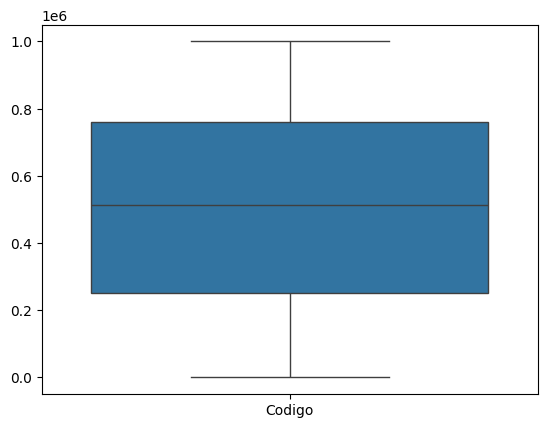

In [39]:
sns.boxplot(dframe_ocup)

In [40]:
from sklearn.cluster import KMeans

In [41]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(dframe_ocup.select_dtypes(include='number'))

In [42]:
df_scaled

array([[0.01010505],
       [0.01011005],
       [0.01011505],
       ...,
       [1.        ],
       [0.999004  ],
       [0.        ]])

In [43]:
# Ajusta para o número correto de linhas
X = np.reshape(df_scaled, (-1,1))

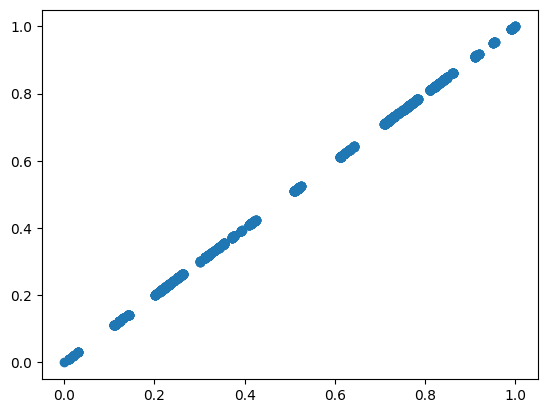

In [44]:
plt.scatter(X, X)

#### Coeficiente de Silhueta

Ele oferece uma análise de quão bem determinada instância foi agrupada, ou seja, o quão semelhante o elemento é comparado aos outros grupos.
- Quanto maior esse coeficiente, mais os clusters estão bem definidos no modelo

A fórmula do Coeficiente de Silhueta é:

$$
  s = \frac{b - a}{ \max (a, b)}
$$

Onde:
- **a** é a distância média entre um ponto e todos os outros pontos do mesmo grupo.
- **b** é a distância média entre o ponto e todos os pontos do cluster mais próximo.


- Avalia o quão bem os grupos estão separados - O ideal é maximizar o valor B (distância entre todos os pontos dos outros grupos) e minimizar o valor A (distância entre os pontos do mesmo grupo)

O Coeficiente de Silhueta pode ser usado para determinar a qualidade do agrupamento e para ajudar a escolher o melhor número de clusters (`k`) em K-Means.

Estrutura:
metrics.silhouette_score(X, labels_gerados, metric='euclidean') Distância euclidiana é padrão

In [45]:
# Verificando qual seria o melhor valor para K

valores_k = []
s = []

for i in range(2,15):
    kmeans_test = KMeans(n_clusters=i, random_state=0, n_init=10).fit(X)
    valores_k.append(i)
    print(i, metrics.silhouette_score(X, kmeans_test.labels_).round(2))
    s.append(metrics.silhouette_score(X, kmeans_test.labels_))

2 0.74
3 0.65
4 0.65
5 0.64
6 0.67
7 0.7
8 0.72
9 0.73
10 0.75
11 0.76
12 0.73
13 0.74
14 0.74


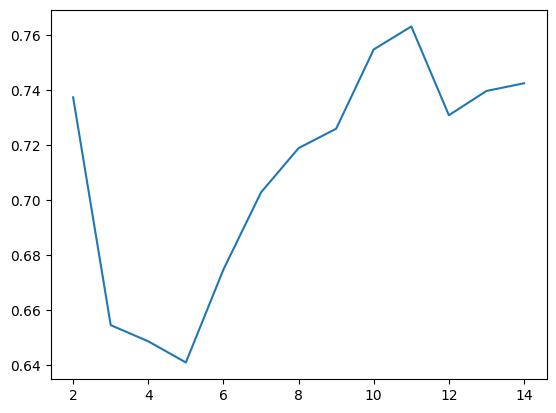

In [46]:
# Plotando o gráfico do Coeficiente de Silhueta
fig, ax = plt.subplots()
ax.plot(valores_k, s)
plt.show()

Dentro desses valores, o que obteve o melhor desempenho foi K = 11

In [47]:
kmeans = KMeans(n_clusters=11, random_state=0, n_init=10).fit(X)
metrics.silhouette_score(X, kmeans.labels_).round(2)

0.76

In [48]:
kmeans.labels_

array([9, 9, 9, ..., 0, 0, 9], dtype=int32)

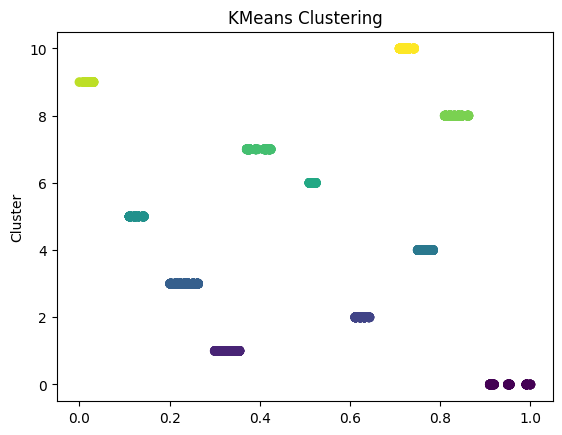

In [49]:
# Plotando o gráfico
fig, ax = plt.subplots()
ax.scatter(X, kmeans.labels_,c=kmeans.labels_)
plt.ylabel('Cluster')
plt.title('KMeans Clustering')
plt.show()

In [50]:
# Centróides de cada cluster (média)
print("Centróides dos clusters: ", (kmeans.cluster_centers_).round(2))

# Agrupando os dados com base nos rótulos
dframe_ocup['Cluster1'] = kmeans.labels_

# Número de valores em cada cluster
print(dframe_ocup['Cluster1'].value_counts())

# Exibindo os dados por cluster
for i in range(11): 
    print(f"Cluster {i}:\n")
    print(dframe_ocup[dframe_ocup['Cluster1'] == i].head())
    print(dframe_ocup[dframe_ocup['Cluster1'] == i].tail())
    print("\n")

Centróides dos clusters:  [[0.94]
 [0.33]
 [0.62]
 [0.23]
 [0.77]
 [0.13]
 [0.52]
 [0.4 ]
 [0.83]
 [0.02]
 [0.72]]
3     557
4     305
10    284
1     278
8     249
2     186
7     176
6     142
5     128
0      95
9      29
Name: Cluster1, dtype: int64
Cluster 0:

                                              Profissao  Codigo  Cluster1
2333  Encarregado de manutenção mecânica de sistemas...  910105         0
2334     Supervisor de manutenção de aparelhos térmicos  910110         0
2335                 Supervisor de manutenção de bombas  910115         0
2336      Supervisor de manutenção de máquinas gráficas  910120         0
2337  Supervisor de manutenção de máquinas industria...  910125         0
                                            Profissao  Codigo  Cluster1
2423                                     Dona de Casa  999992         0
2424                           Aposentado/Pensionista  999993         0
2425  Desempregado cronico ou cuja habitação habitual  999994         0
24

Cluster 1 - ANALISE - Um padrão que pude observar é que os 3 primeiros números do código CBO possui um padrão para uma classificação mais generalizada:

- Cluster 0: 910 - 992 - até 999 OK
- Cluster 1: 300 - 395 - Result: 300 - 354
- Cluster 2: 611 a 643 - OK
- Cluster 3: 201 a 263 - OK
- Cluster 4: 710 - 784 - Result: de 750 - 784
- Cluster 5: 111 - 142 - OK
- Cluster 6: 510 - 524 - OK
- Cluster 7: PARTE DO CLUSTER 1 (371 - 395) + 410 - 424
- Cluster 8: 810 - 862 - OK
- Cluster 9: 010 - 031 (0 - nao informada) - OK
- Cluster 10: RESTANTE DO Cluster 4

A partir dessa análise, foi possível perceber que os grupos foram bem agrupados entre si, porém houveram 2 grupos que foram misturados

### Reduzindo o n° de K - 9 Grupos

In [51]:
kmeans_2 = KMeans(n_clusters=9, random_state=0, n_init=10).fit(X)
metrics.silhouette_score(X, (kmeans_2.labels_).round(2))

0.726004048573323

Obtivemos um valor de silueta menor, porém 9 grupos seria o suficiente para classificar as profissões

In [52]:
dframe_ocup['Cluster2'] = kmeans_2.labels_

# Visualizando o número de elementos em cada cluster
print(dframe_ocup['Cluster2'].value_counts())

# Exibindo os dados por cluster
for i in range(9): 
    print(f"Cluster {i}:\n")
    print(dframe_ocup[dframe_ocup['Cluster2'] == i].head())
    print(dframe_ocup[dframe_ocup['Cluster2'] == i].tail())

    print("\n")

1    589
5    557
2    278
4    249
3    186
8    176
0    157
6    142
7     95
Name: Cluster2, dtype: int64
Cluster 0:

                        Profissao  Codigo  Cluster1  Cluster2
0  Oficial General da Aeronáutica   10105         9         0
1     Oficial General do Exército   10110         9         0
2      Oficial General da Marinha   10115         9         0
3          Oficial da Aeronáutica   10205         9         0
4             Oficial do Exército   10210         9         0
                                              Profissao  Codigo  Cluster1  \
152    Gerente de segurança de tecnologia da informação  142525         5   
153   Gerente de suporte técnico de tecnologia da in...  142530         5   
154         Gerente de pesquisa e desenvolvimento (P&D)  142605         5   
155        Gerente de projetos e serviços de manutenção  142705         5   
2428                                      Nao informada       0         9   

      Cluster2  
152          0  
153      

Cluster 2
 - Cluster 0: 010 - 142 - Result: mistura entre 2 grupos (010 - 031) (111 - 142)
 - Cluster 1: Divisão correta - 710 - 784 
 - Cluster 2: 300 - 395 - Result: Começou 300 - 354
 - Cluster 3: 611 a 643 - OK
 - Cluster 4: 810 - 862 - OK
 - Cluster 5: 201 a 263 - OK

 - Cluster 6: 510 - 524 - OK
 - Cluster 7: 910 - 999 - OK
 - Cluster 8: 371 - 424 - Mistura entre 2 grupos, assim como o cluster 1

Apesar de ainda ter 1 grupo misturado, obteve um resultado mais próximo do esperado

A partir desse resultado obtido, irei organizar o agrupamento correto entre os valores, para que assim possa trabalharar com esses valores também

In [53]:
Grupos = ['Militares', 'Poder Público e Gerentes', 'Profissionais de Ciências e Artes', 'Técnicos', 
          'Serviços Administrativos', 'Trabalhadores de vendas e comércios', 
          'Trabalhadores Agropecuários, florestais e da pesca', 'Trabalhadores de produção e serviços industriais extrativa',
          'Trabalhadores em Indústrias de processos contínuos', 'Trabalhadores de reparação e manutenção']

In [54]:
dframe_ocup['Cluster_Final'] = None


manutencao = (dframe_ocup['Cluster1'] == 0) & (dframe_ocup['Profissao'] != 'Ignorada')
tecnico = ((dframe_ocup['Cluster1'] == 1) | ((dframe_ocup['Cluster1'] == 7) & (dframe_ocup['Codigo'].isin(range(371, 395)))))
agropecuarios = (dframe_ocup['Cluster1'] == 2)
ciencias = (dframe_ocup['Cluster1'] == 3)
poder_publico = (dframe_ocup['Cluster1'] == 5)
comerciantes = (dframe_ocup['Cluster1'] == 6)
administrativos = (dframe_ocup['Cluster1'] == 7) & (~dframe_ocup['Codigo'].isin(range(371, 395)))
industria_continua = (dframe_ocup['Cluster1'] == 8)
militares = (dframe_ocup['Cluster1'] == 9) & (dframe_ocup['Profissao'] != 'Nao informada')
nao_informada = (dframe_ocup['Cluster1'] == 9) & (dframe_ocup['Codigo'] == 0)
ignorado = (dframe_ocup['Cluster1'] == 0) & (dframe_ocup['Profissao'] == 'Ignorada')
ind_extrativa = (dframe_ocup['Cluster2'] == 1)

In [55]:
dframe_ocup.loc[militares, 'Cluster_Final'] = 1
dframe_ocup.loc[poder_publico, 'Cluster_Final'] = 2
dframe_ocup.loc[ciencias, 'Cluster_Final'] = 3
dframe_ocup.loc[tecnico, 'Cluster_Final'] = 4
dframe_ocup.loc[administrativos, 'Cluster_Final'] = 5
dframe_ocup.loc[comerciantes, 'Cluster_Final'] = 6
dframe_ocup.loc[agropecuarios, 'Cluster_Final'] = 7
dframe_ocup.loc[ind_extrativa, 'Cluster_Final'] = 8
dframe_ocup.loc[industria_continua, 'Cluster_Final'] = 9
dframe_ocup.loc[manutencao, 'Cluster_Final'] = 10
dframe_ocup.loc[nao_informada, 'Cluster_Final'] = 11
dframe_ocup.loc[ignorado, 'Cluster_Final'] = 11

In [56]:
# Dessa forma, possuimos uma tabela generalizada de profissões, e apenas 11 elementos unicos

dframe_ocup = dframe_ocup.drop(['Cluster1', 'Cluster2'], axis=1)

dframe_ocup.head()

,Profissao,Codigo,Cluster_Final
0,Oficial General da Aeronáutica,10105,1
1,Oficial General do Exército,10110,1
2,Oficial General da Marinha,10115,1
3,Oficial da Aeronáutica,10205,1
4,Oficial do Exército,10210,1


In [57]:
# Removendo os valores nulos > Classificando como 0 (nao informado)

dframe['OCUP'] = dframe['OCUP'].fillna(0)

In [58]:
dframe.isnull().sum()

DTOBITO       0
DTNASC        0
IDADE         0
SEXO          0
RACACOR       0
ESTCIV        0
ESC           0
OCUP          0
LOCOCOR       0
ASSISTMED     0
NECROPSIA     0
LINHAA        0
LINHAB        0
LINHAC        0
LINHAD        0
LINHAII       0
CAUSABAS      0
DIFDATA       0
CAUSABAS_O    0
Locais        0
Região        0
dtype: int64

In [59]:
# Realizando o merge com o dataset principal

colunas_ocup =  dframe_ocup[['Codigo','Cluster_Final']]

dframe_merged = pd.merge(dframe, colunas_ocup, how='inner', left_on='OCUP', right_on='Codigo')

dframe = dframe_merged.drop('Codigo', axis=1)

In [60]:
dframe = dframe.drop('OCUP', axis=1)

In [61]:
dframe.head()

,DTOBITO,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,LOCOCOR,ASSISTMED,NECROPSIA,...,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,DIFDATA,CAUSABAS_O,Locais,Região,Cluster_Final
0,2024-02-13,1939-04-08,Idoso,1,1.0,2.0,4.0,3,9.0,9.0,...,C,NA,NA,NA,C,22,C,São Paulo,Sudeste,10
1,2024-02-13,1930-02-10,Idoso,2,1.0,3.0,2.0,3,9.0,9.0,...,I,NA,NA,NA,I,22,I,São Paulo,Sudeste,10
2,2024-02-13,1932-04-29,Idoso,1,1.0,3.0,3.0,2,1.0,2.0,...,I,B,NA,NA,B,22,B,São Paulo,Sudeste,10
3,2024-02-13,1951-09-11,Idoso,1,2.0,4.0,9.0,5,1.0,2.0,...,NA,NA,NA,NA,R,22,R,São Paulo,Sudeste,10
4,2024-02-17,1942-01-15,Idoso,2,1.0,4.0,4.0,3,2.0,2.0,...,R,NA,NA,E,E,65,E,São Paulo,Sudeste,10


In [62]:
dframe['Cluster_Final'] = dframe['Cluster_Final'].astype(int)

# Codificação das colunas categóricas

A maioria dos algoritmos de Aprendizado de Máquina prefere trabalhar com números, visto que grande parte dos dados presentes neste projeto são categóricos, há a necessidade de codificá-los.

Para isso, ao longo das aulas, foram apresentados 2 metedologias para realizar a códificação:
- LabelEncoder() / Codificação de Rótulos: Essa técnica interpreta a ordem dos números como uma ordem de importância. Essa codificação é aplicada na coluna 'ESC', ou escolaridade, onde 1 representa nenhuma e 5 de 12 anos ou mais, com a presença do valor 9 - Ignorado.

- OneHotEncoding(): Essa técnica cria uma nova coluna para cada categoria e atribui 1 para a categoria correspondente e 0 para as demais, preservando a natureza categórica dos dados.

In [63]:
dframe.head()

,DTOBITO,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,LOCOCOR,ASSISTMED,NECROPSIA,...,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,DIFDATA,CAUSABAS_O,Locais,Região,Cluster_Final
0,2024-02-13,1939-04-08,Idoso,1,1.0,2.0,4.0,3,9.0,9.0,...,C,NA,NA,NA,C,22,C,São Paulo,Sudeste,10
1,2024-02-13,1930-02-10,Idoso,2,1.0,3.0,2.0,3,9.0,9.0,...,I,NA,NA,NA,I,22,I,São Paulo,Sudeste,10
2,2024-02-13,1932-04-29,Idoso,1,1.0,3.0,3.0,2,1.0,2.0,...,I,B,NA,NA,B,22,B,São Paulo,Sudeste,10
3,2024-02-13,1951-09-11,Idoso,1,2.0,4.0,9.0,5,1.0,2.0,...,NA,NA,NA,NA,R,22,R,São Paulo,Sudeste,10
4,2024-02-17,1942-01-15,Idoso,2,1.0,4.0,4.0,3,2.0,2.0,...,R,NA,NA,E,E,65,E,São Paulo,Sudeste,10


Ao analisar os dados, pude notar que há coluans com a codificação de rótulos, que pode ser um problema para o modelo, já que o modelor pode interpretar a ordem dos números como ordem de importância

In [64]:
dframe['RACACOR'].unique()

array([1., 2., 3., 4., 5., 6.])

In [65]:
dframe['ESTCIV'].unique()

array([2., 3., 4., 5., 1., 9.])

In [66]:
dframe['LOCOCOR'].unique()

array([3, 2, 5, 1, 4, 9, 6])

In [67]:
dframe['ASSISTMED'].unique()

array([9., 1., 2.])

In [68]:
dframe['NECROPSIA'].unique()

array([9., 2., 1.])

In [69]:
dframe['RACACOR'] = dframe['RACACOR'].astype(int)
dframe['ESTCIV'] = dframe['ESTCIV'].astype(int)
dframe['ESC'] = dframe['ESC'].astype(int)
dframe['LOCOCOR'] = dframe['LOCOCOR'].astype(int)
dframe['ASSISTMED'] = dframe['ASSISTMED'].astype(int)
dframe['NECROPSIA'] = dframe['NECROPSIA'].astype(int)

In [70]:
dframe['Região'].unique()

array(['Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste', 'Sul',
       'América do Sul', 'Europa Ocidental', 'América Central', 'África',
       'Europa Oriental', 'Ásia Ocidental', 'Ásia Oriental',
       'América do Norte'], dtype=object)

In [71]:
dframe['LINHAA'].unique()

array(['R', 'I', 'J', 'A', 'T', 'N', 'S', 'E', 'C', 'K', 'Y', 'D', 'G',
       'M', 'B', 'L', 'W', 'F', 'X', 'H', 'Q', 'V', 'P', 'O', 'Z'],
      dtype=object)

In [72]:
dframe['LINHAB'].unique()

array(['C', 'I', 'NA', 'R', 'J', 'N', 'A', 'E', 'K', 'V', 'G', 'B', 'T',
       'S', 'L', 'D', 'Y', 'W', 'X', 'Z', 'H', 'F', 'M', 'Q', 'P', 'U',
       'O'], dtype=object)

In [73]:
dframe['LINHAC'].unique()

array(['NA', 'B', 'C', 'I', 'N', 'A', 'X', 'R', 'L', 'E', 'J', 'G', 'T',
       'K', 'W', 'F', 'Y', 'S', 'D', 'M', 'V', 'Z', 'H', 'Q', 'O', 'U',
       'P'], dtype=object)

In [74]:
dframe['LINHAD'].unique()

array(['NA', 'N', 'A', 'I', 'J', 'S', 'E', 'W', 'R', 'Y', 'C', 'K', 'G',
       'D', 'B', 'F', 'T', 'L', 'V', 'M', 'X', 'Q', 'Z', 'H', 'U', 'P',
       'O'], dtype=object)

In [75]:
dframe['LINHAII'].unique()

array(['NA', 'E', 'I', 'Y', 'R', 'D', 'F', 'N', 'G', 'C', 'K', 'J', 'A',
       'T', 'L', 'S', 'M', 'B', 'Z', 'Q', 'W', 'X', 'H', 'U', 'O', 'V',
       'P'], dtype=object)

In [76]:
dframe['CAUSABAS'].unique()

array(['C', 'I', 'B', 'R', 'E', 'N', 'A', 'X', 'G', 'J', 'V', 'Y', 'W',
       'K', 'L', 'D', 'F', 'M', 'H', 'Q', 'O', 'P'], dtype=object)

Dessa forma, irei aplicar o one hot em todos esses dados

In [77]:
one_hot_encoded = pd.get_dummies(dframe, columns=['Região'], dtype=int)

In [78]:
dframe = one_hot_encoded

In [79]:
dframe.head()

,DTOBITO,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,LOCOCOR,ASSISTMED,NECROPSIA,...,Região_Centro-Oeste,Região_Europa Ocidental,Região_Europa Oriental,Região_Nordeste,Região_Norte,Região_Sudeste,Região_Sul,Região_África,Região_Ásia Ocidental,Região_Ásia Oriental
0,2024-02-13,1939-04-08,Idoso,1,1,2,4,3,9,9,...,0,0,0,0,0,1,0,0,0,0
1,2024-02-13,1930-02-10,Idoso,2,1,3,2,3,9,9,...,0,0,0,0,0,1,0,0,0,0
2,2024-02-13,1932-04-29,Idoso,1,1,3,3,2,1,2,...,0,0,0,0,0,1,0,0,0,0
3,2024-02-13,1951-09-11,Idoso,1,2,4,9,5,1,2,...,0,0,0,0,0,1,0,0,0,0
4,2024-02-17,1942-01-15,Idoso,2,1,4,4,3,2,2,...,0,0,0,0,0,1,0,0,0,0


Como analisado acima, temos uma coluna em que o one hot encoding se encaixa perfeitamente

In [80]:
dframe['LINHAA'].unique()

array(['R', 'I', 'J', 'A', 'T', 'N', 'S', 'E', 'C', 'K', 'Y', 'D', 'G',
       'M', 'B', 'L', 'W', 'F', 'X', 'H', 'Q', 'V', 'P', 'O', 'Z'],
      dtype=object)

A linha A possuí muitos valores unicos, o que me causaria problemas se realizasse uma codificação de one hot

In [81]:
encoder = LabelEncoder()

dframe['LINHAA'] = encoder.fit_transform(dframe['LINHAA'])
dframe['IDADE'] = encoder.fit_transform(dframe['IDADE'])

In [82]:
dframe['LINHAB'] = encoder.fit_transform(dframe['LINHAB'])
dframe['LINHAC'] = encoder.fit_transform(dframe['LINHAC'])
dframe['LINHAD'] = encoder.fit_transform(dframe['LINHAD'])
dframe['LINHAII'] = encoder.fit_transform(dframe['LINHAII'])
dframe['CAUSABAS'] = encoder.fit_transform(dframe['CAUSABAS'])
dframe['CAUSABAS_O'] = encoder.fit_transform(dframe['CAUSABAS_O'])

In [83]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415226 entries, 0 to 415225
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DTOBITO                  415226 non-null  datetime64[ns]
 1   DTNASC                   415226 non-null  datetime64[ns]
 2   IDADE                    415226 non-null  int64         
 3   SEXO                     415226 non-null  int64         
 4   RACACOR                  415226 non-null  int64         
 5   ESTCIV                   415226 non-null  int64         
 6   ESC                      415226 non-null  int64         
 7   LOCOCOR                  415226 non-null  int64         
 8   ASSISTMED                415226 non-null  int64         
 9   NECROPSIA                415226 non-null  int64         
 10  LINHAA                   415226 non-null  int64         
 11  LINHAB                   415226 non-null  int64         
 12  LINHAC          

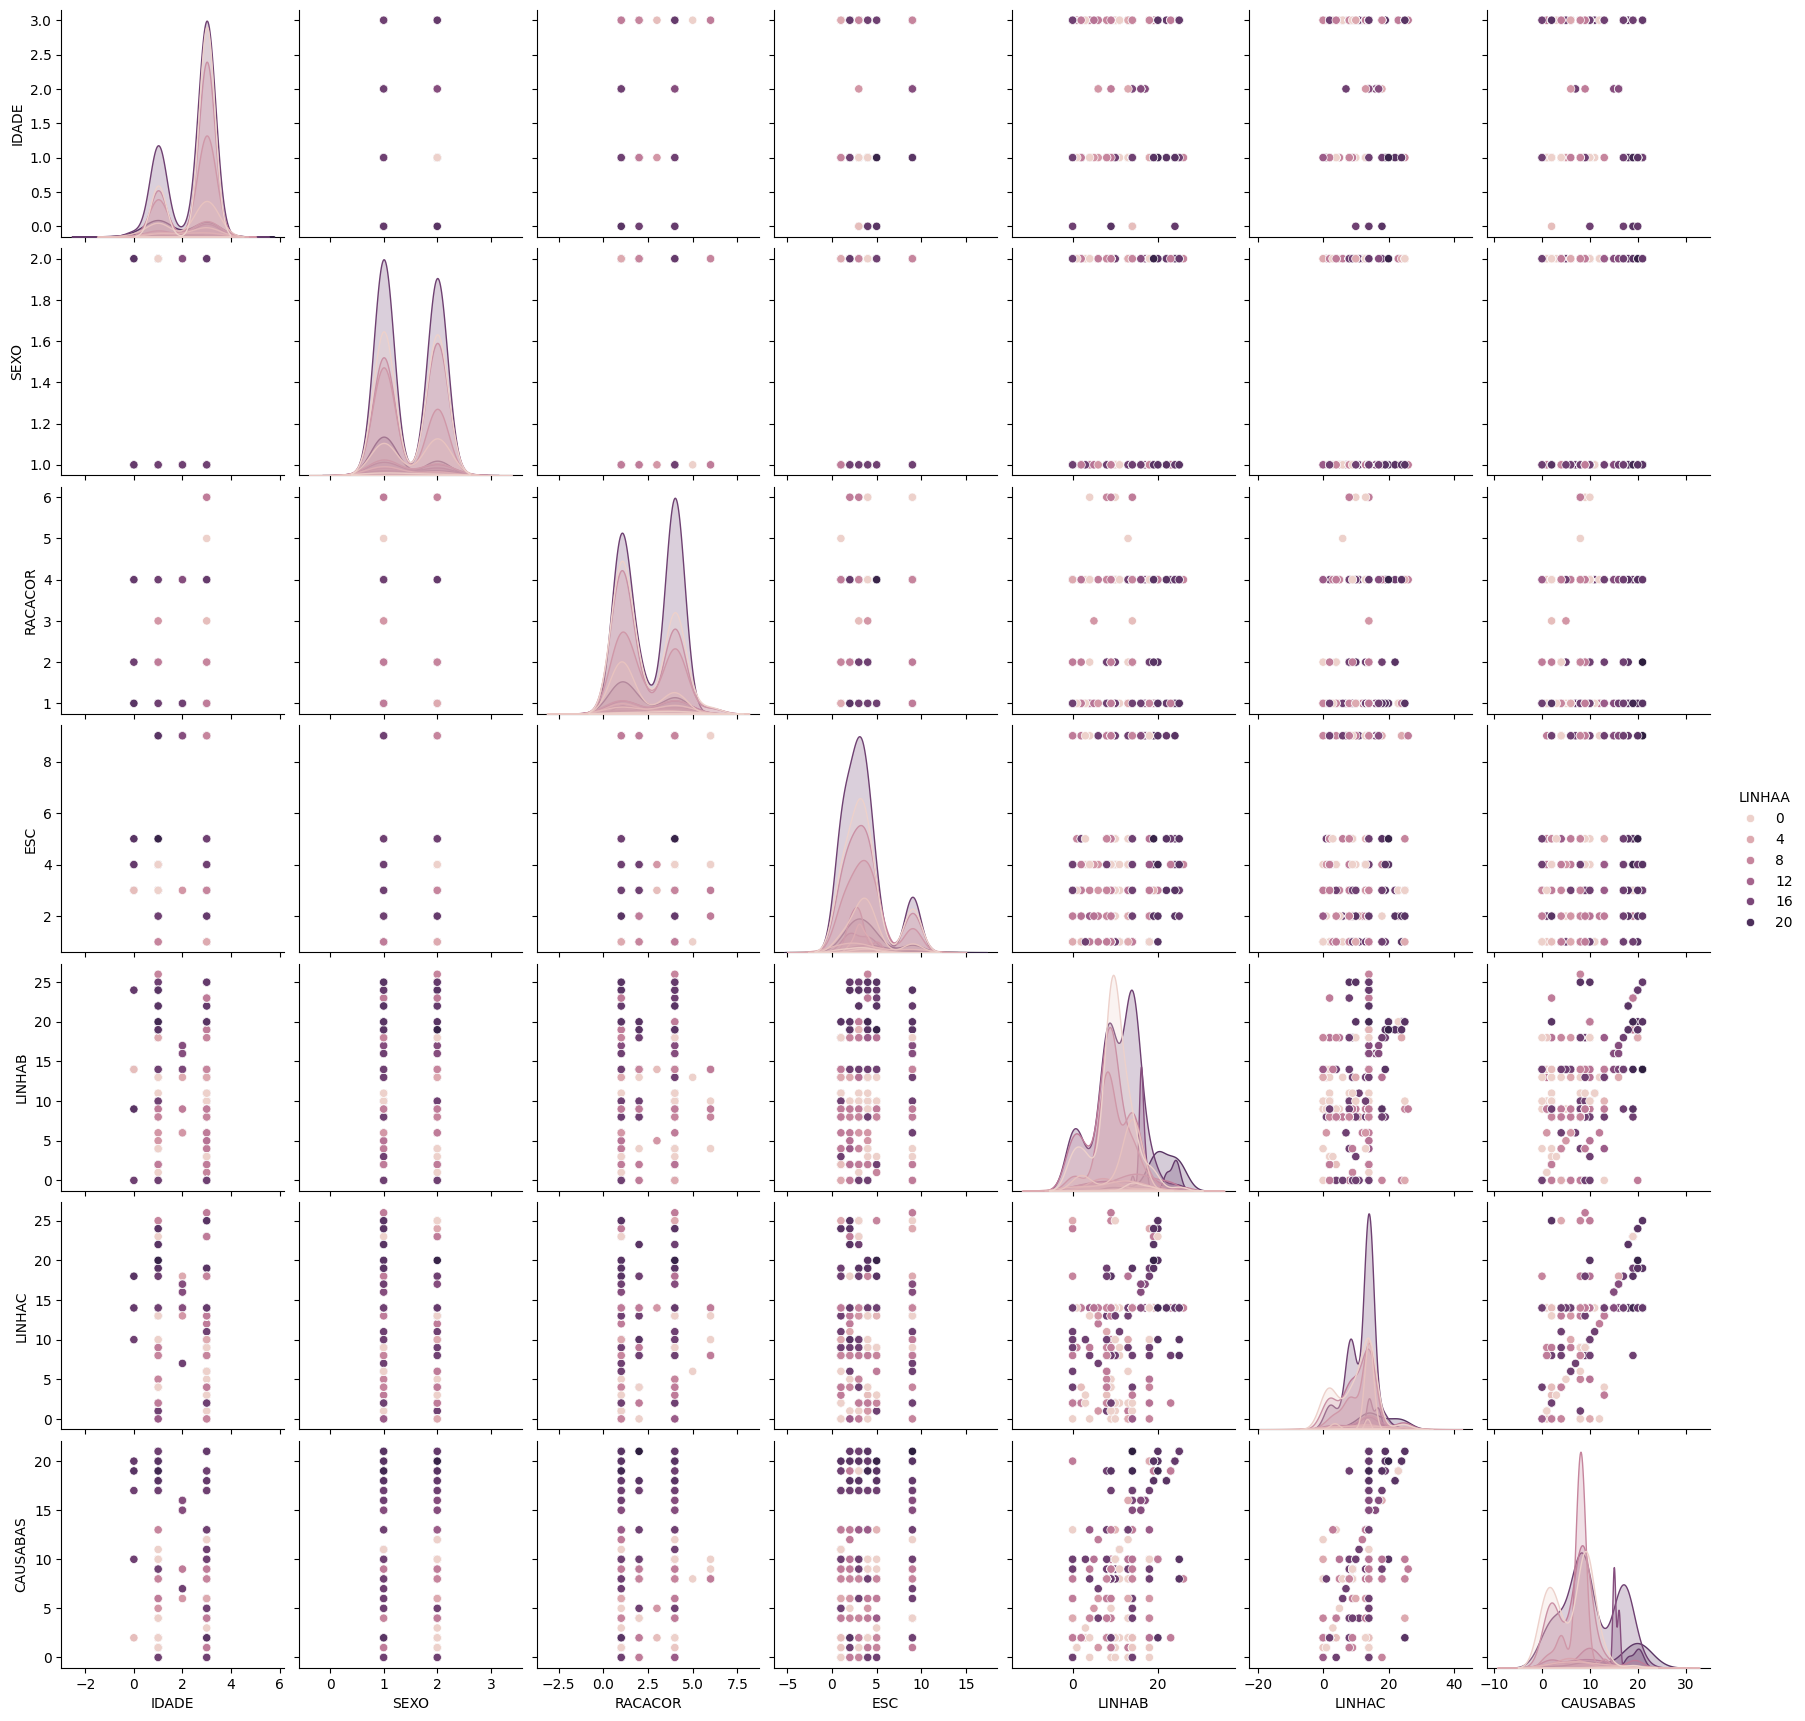

In [84]:
# Amostrar 5.000 linhas aleatoriamente
sampled_data = dframe.sample(n=500, random_state=42)

# Criar o pairplot com a amostra
sns.pairplot(sampled_data[['IDADE', 'SEXO', 'RACACOR', 'ESC', 'LINHAA', 'LINHAB', 'LINHAC', 'CAUSABAS']], hue='LINHAA')

O pairplot exibe as relações entre as variáveis de um conjunto de dados, permitindo identificar padrões, correlações e distribuições
Ao observar os gráficos acima, podemos notar que os valores são bem definidos e há baixa correlação entre os dados. Também é possível notar que os dados possuem sobreposição e não possuem uma divisão clara, dificultando na identificação de padrões. Também é possível notar que grande parte dos dados são variáveis categóricas.

In [85]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415226 entries, 0 to 415225
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DTOBITO                  415226 non-null  datetime64[ns]
 1   DTNASC                   415226 non-null  datetime64[ns]
 2   IDADE                    415226 non-null  int64         
 3   SEXO                     415226 non-null  int64         
 4   RACACOR                  415226 non-null  int64         
 5   ESTCIV                   415226 non-null  int64         
 6   ESC                      415226 non-null  int64         
 7   LOCOCOR                  415226 non-null  int64         
 8   ASSISTMED                415226 non-null  int64         
 9   NECROPSIA                415226 non-null  int64         
 10  LINHAA                   415226 non-null  int64         
 11  LINHAB                   415226 non-null  int64         
 12  LINHAC          

<Axes: >

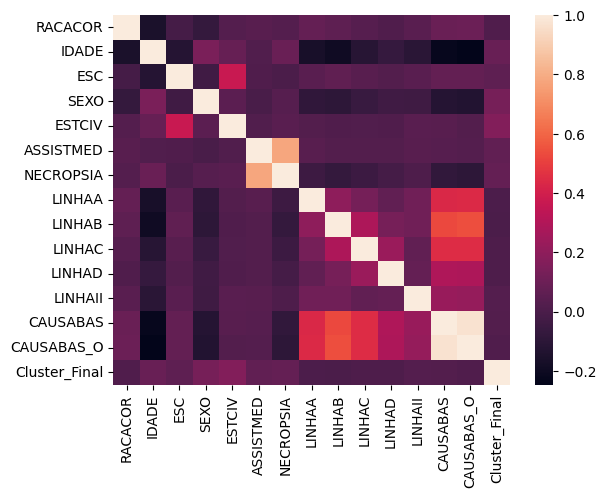

In [86]:
sns.heatmap(dframe[['RACACOR', 'IDADE', 'ESC', 'SEXO', 'ESTCIV', 'ASSISTMED', 'NECROPSIA', 'LINHAA', 'LINHAB',
                   'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CAUSABAS_O', 'Cluster_Final']].corr())

In [87]:
dframe[['RACACOR', 'IDADE', 'ESC', 'SEXO', 'ESTCIV', 'ASSISTMED', 'NECROPSIA', 'LINHAA', 'LINHAB',
                   'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CAUSABAS_O', 'Cluster_Final']].corr()

,RACACOR,IDADE,ESC,SEXO,ESTCIV,ASSISTMED,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,CAUSABAS_O,Cluster_Final
RACACOR,1.000000,-0.157866,-0.021761,-0.072472,0.030752,0.037380,0.028052,0.078604,0.057263,0.032746,0.013724,0.045376,0.091607,0.094655,0.011921
IDADE,-0.157866,1.000000,-0.120366,0.140164,0.081292,0.020891,0.089766,-0.166668,-0.195420,-0.117954,-0.067274,-0.107820,-0.224226,-0.246664,0.086691
ESC,-0.021761,-0.120366,1.000000,-0.036568,0.369094,0.014765,0.001111,0.042849,0.061500,0.036404,0.024626,0.045445,0.071808,0.070792,0.057570
SEXO,-0.072472,0.140164,-0.036568,1.000000,0.050134,-0.006172,0.031693,-0.090601,-0.097980,-0.061351,-0.033548,-0.039613,-0.120122,-0.129941,0.132025
ESTCIV,0.030752,0.081292,0.369094,0.050134,1.000000,0.018186,0.040676,0.024161,0.013043,0.017379,0.013741,0.041109,0.039421,0.024037,0.162841
ASSISTMED,0.037380,0.020891,0.014765,-0.006172,0.018186,1.000000,0.778491,0.038008,0.023220,0.023820,0.025238,0.037418,0.034597,0.028062,0.065916
NECROPSIA,0.028052,0.089766,0.001111,0.031693,0.040676,0.778491,1.000000,-0.044848,-0.071926,-0.047412,-0.019672,0.008514,-0.085072,-0.098202,0.077300
LINHAA,0.078604,-0.166668,0.042849,-0.090601,0.024161,0.038008,-0.044848,1.000000,0.199768,0.124022,0.065521,0.110033,0.432047,0.439680,0.003947
LINHAB,0.057263,-0.195420,0.061500,-0.097980,0.013043,0.023220,-0.071926,0.199768,1.000000,0.288602,0.130933,0.111561,0.524807,0.540133,-0.002405
LINHAC,0.032746,-0.117954,0.036404,-0.061351,0.017379,0.023820,-0.047412,0.124022,0.288602,1.000000,0.235217,0.069145,0.447485,0.449144,0.011019


Ao analisar a correlação entre as variáveis, é evidente que as colunas CAUSABAS e CAUSABAS_O apresentam uma alta correlação, indicando redundância nos dados. Por isso, a utilização de ambas as colunas em conjunto não seria recomendada, sendo mais interessante selecionar apenas uma delas para a análise.

Além disso, observa-se que, de maneira geral, as variáveis possuem correlações fracas, com baixa linearidade entre si. Esse comportamento sugere que algoritmos baseados em regressão linear podem não ser os mais adequados para modelar essas relações, já que esses métodos dependem de uma relação linear mais forte entre as features e o alvo. Dessa forma, seria mais interessante explorar algoritmos que consigam capturar padrões não lineares nos dados.

# 5° Avaliação da Máquina

## Selecionando as Features para treinamento

In [88]:
# Variaveis médicas

X = dframe[['ASSISTMED', 'NECROPSIA', 'LINHAB', 'LINHAC', 'CAUSABAS', 'LINHAII']]
y = dframe['LINHAA']

In [89]:
X_all = dframe.drop(columns=['LINHAA', 'DTOBITO', 'DTNASC','DIFDATA', 'CAUSABAS_O', 'Locais'])

In [90]:
#  CIDs apenas

X_cids = dframe[['LINHAB', 'LINHAC', 'CAUSABAS', 'LINHAII']]

In [184]:
# Demográfico

X_dem = dframe[['IDADE', 'SEXO','ESC', 'RACACOR']]

In [189]:
# socioeconômico

X_soc = dframe[['ESC', 'ESTCIV','SEXO', 'Cluster_Final']]

In [92]:
# Hot enconding
X = pd.get_dummies(X, columns=['ASSISTMED', 'NECROPSIA'], drop_first=False).astype(int)

In [93]:
X.head()

,LINHAB,LINHAC,CAUSABAS,LINHAII,ASSISTMED_1,ASSISTMED_2,ASSISTMED_9,NECROPSIA_1,NECROPSIA_2,NECROPSIA_9
0,2,14,2,14,0,0,1,0,0,1
1,8,14,8,14,0,0,1,0,0,1
2,8,1,1,14,1,0,0,0,1,0
3,14,14,17,14,1,0,0,0,1,0
4,18,14,4,4,0,1,0,0,1,0


In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415226 entries, 0 to 415225
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   LINHAB       415226 non-null  int64
 1   LINHAC       415226 non-null  int64
 2   CAUSABAS     415226 non-null  int64
 3   LINHAII      415226 non-null  int64
 4   ASSISTMED_1  415226 non-null  int64
 5   ASSISTMED_2  415226 non-null  int64
 6   ASSISTMED_9  415226 non-null  int64
 7   NECROPSIA_1  415226 non-null  int64
 8   NECROPSIA_2  415226 non-null  int64
 9   NECROPSIA_9  415226 non-null  int64
dtypes: int64(10)
memory usage: 34.8 MB


In [95]:
y.value_counts()

17    114843
0      76821
9      76164
8      52589
2      22256
19     19020
18     10846
10      7864
13      7586
4       6468
15      5298
6       5190
23      1895
22      1765
3       1634
21      1592
1        872
11       672
20       555
16       502
5        465
12       221
14        91
7         13
24         4
Name: LINHAA, dtype: int64

Como podemos observar, há um desbalanceamento grande na variável alvo. Dessa forma, irei optar por seguir com as top 4 deoenças que mais causaram óbitos no primeiro semestre de 2024, visto que varia de 4 à 114K registros.

Dessa forma, reduzo o desbalanceamento e foco nas causas mais relevantes e que tiveram um impacto mais significativo.

In [190]:
# valor mínimo de 30k
min_value = 30000

# selecionar as variáveis de y onde a contagem de valores é maior ou igual que o valor mínimo definido
y_values = y[y.map(y.value_counts()) >= min_value]

# Ajusta os valores de X com base nos índices de y_values
X = X.loc[y_values.index]
X_all = X_all.loc[y_values.index]
X_dem = X_dem.loc[y_values.index]
X_cids = X_cids.loc[y_values.index]
X_soc = X_soc.loc[y_values.index]

y = y_values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.3, random_state=42)
X_train_dem, X_test_dem, y_train_dem, y_test_dem = train_test_split(X_dem, y, test_size=0.3, random_state=42)
X_train_cid, X_test_cid, y_train_cid, y_test_cid = train_test_split(X_cids, y, test_size=0.3, random_state=42)
X_train_soc, X_test_soc, y_train_soc, y_test_soc = train_test_split(X_soc, y, test_size=0.3, random_state=42)

In [97]:
y.value_counts()

17    114843
0      76821
9      76164
8      52589
Name: LINHAA, dtype: int64

desbalanceados!

# Naive Bayes

Princípio: Cada par de características sendo classificadas é independente uma da outra

É um algoritmo rápido e facilita a previsão com alta dimensão de dados. Prevê a probabilidade de uma instância pertencer a uma classe com um conjunto de valores características. É um classificador probabilístico, pois assume que uma característica no modelo é independente da existência de uma outra característica. Contribuí para as previsões sem relação entre si. 

O algoritmo de Naive Bayes é formado por 5 tipos de algoritmos:
- Gaussian Naive Bayes: Features com distribuições normais e variáveis contínuas.
- Multinomial Naive Bayes: Dados discretos, como contagens de frequência, aplicado em casos de uso de processamento de linguagem natural, como classificação de spam
- Bernoulli Naive Bayes: Utiliza variáveis booleanas (0 e 1)
- Complement Naive Bayes: Trabalhar conjuntos de dados desbalanceados
- Categorical Naive Bayes: Classificação com características discretas que são distribuídas categoricamente, podendo lidar com as nuances de várias categorias

Para esse projeto, estarei implementando o Categorical Naive Bayes, visto que lida melhor com as nuances de categorias, visto que meus dados são categóricos, seria uma abordagem adequada para os meus dados

In [98]:
from sklearn.naive_bayes import CategoricalNB

### Features Médicas sem balanceamento

In [99]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

y_pred = cnb.predict(X_test)

# Avaliação
acuracia_ft_medicas_cnb = metrics.accuracy_score(y_test, y_pred)
print("Features Médicas sem Balanceamento: ")
print('Acurácia: ', (acuracia_ft_medicas_cnb *100).round(2))
print(metrics.classification_report(y_test, y_pred))

Features Médicas sem Balanceamento: 
Acurácia:  49.93
              precision    recall  f1-score   support

           0       0.50      0.59      0.54     22888
           8       0.45      0.70      0.55     15802
           9       0.44      0.43      0.43     22964
          17       0.61      0.39      0.48     34472

    accuracy                           0.50     96126
   macro avg       0.50      0.53      0.50     96126
weighted avg       0.52      0.50      0.49     96126



## SMOTE

SMOTE é uma técnica de sobreamostragem de minoria sintética, um dos métodos mais usados para resolver o problema de desequilíbrio de classes. Esse métodos visa equilibrar a distribuição de classes, aumentando aleatoriamente os exemplos da classe minoritária replicando-os.
O SMOTE sintetiza novas instâncias minoritárias entre as instâncias minoritárias existentes

In [100]:
y_train.value_counts()

17    80371
0     53933
9     53200
8     36787
Name: LINHAA, dtype: int64

Como é possível analisar, a variavel alvo possui os dados desbalanceados, o que pode impactar o modelo, fazendo com ele prever apenas as variaveis mais comuns, generalizando, dessa forma, os resultados

In [101]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print('Após o OverSampling X train: {}'.format(X_train_smote.shape))
print('Após o OverSampling Y train: {}'.format(y_train_smote.shape))

Após o OverSampling X train: (321484, 10)
Após o OverSampling Y train: (321484,)


Como podemos analisar, as variáveis que estavam com pouco valor, aumentaram com o algoritmo de sobreamostragem. Para essa análise, não é o cenário ideal, visto que gera registros sintéticos gerados selecionando aleatoriamente um ou mais dos k-vizinhos mais próximos para cada exemplo na classe minoritária, fazendo com o que a variável alvo perdesse a sua confiabilidade. 

Mas para fins didáticos e exploratórios, irei verificar se após a normalização, obtivemos algum resultado superior ao antecedente.

In [102]:
# Treinando o modelo
cnb.fit(X_train_smote, y_train_smote)

y_pred = cnb.predict(X_test)

# Avaliação
acuracia_ft_medicas_cnb_smt = metrics.accuracy_score(y_test, y_pred)
print("Features Médicas com SMOTE: ")
print('Acurácia: ', (acuracia_ft_medicas_cnb_smt *100).round(2))
print(metrics.classification_report(y_test, y_pred))

Features Médicas com SMOTE: 
Acurácia:  49.5
              precision    recall  f1-score   support

           0       0.50      0.62      0.55     22888
           8       0.42      0.77      0.55     15802
           9       0.43      0.44      0.44     22964
          17       0.72      0.32      0.44     34472

    accuracy                           0.49     96126
   macro avg       0.52      0.54      0.49     96126
weighted avg       0.55      0.49      0.48     96126



# NearMiss

o NearMiss é uma técnica de subamostragem que reduz a quantidade de amostras da classe majoritária, buscando equilibrar o conjunto de dados. Diferente do SMOTE, que gera novas amostras sintéticas para aumentar a representatividade das classes minoritárias, o NearMiss trabalha removendo exemplos da classe majoritária com base em certos critérios, reduzindo o número de amostras em vez de adicioná-las.

Essa abordagem para esse projeto é o ideal, visto que matém a confiabilidade e integridade dos dados CID's

In [103]:
from imblearn.under_sampling import NearMiss

nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)
print('Após a Subamostragem X train: {}'.format(X_train_miss.shape))
print('Após o Subamostragem Y train: {}'.format(y_train_miss.shape))

print(y_train_miss.value_counts())

Após a Subamostragem X train: (147148, 10)
Após o Subamostragem Y train: (147148,)
0     36787
8     36787
9     36787
17    36787
Name: LINHAA, dtype: int64


In [104]:
cnb.fit(X_train_miss, y_train_miss)

y_pred = cnb.predict(X_test)

acuracia_ft_medicas_cnb_miss = metrics.accuracy_score(y_test, y_pred)
print("Features Médicas com SMOTE: ")
print('Acurácia: ', (acuracia_ft_medicas_cnb_miss *100).round(2))
print(metrics.classification_report(y_test, y_pred))

Features Médicas com SMOTE: 
Acurácia:  46.76
              precision    recall  f1-score   support

           0       0.46      0.65      0.54     22888
           8       0.40      0.79      0.53     15802
           9       0.42      0.35      0.38     22964
          17       0.70      0.28      0.40     34472

    accuracy                           0.47     96126
   macro avg       0.50      0.52      0.46     96126
weighted avg       0.53      0.47      0.45     96126



### Avaliando os Resultados

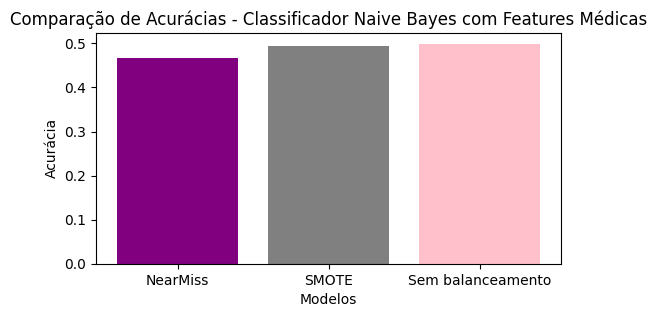

In [105]:
acuracias = [acuracia_ft_medicas_cnb_miss, acuracia_ft_medicas_cnb_smt, acuracia_ft_medicas_cnb]
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

plt.figure(figsize=(6, 3))
plt.title('Comparação de Acurácias - Classificador Naive Bayes com Features Médicas')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.bar(modelos, acuracias, color=['purple', 'gray', 'pink'])

plt.show()

Bom, como é possível notar, o naive bayes não teve um bom desempenho para esses dados, uma vez que a acurácia foram baixas. 
Com os dados desequilibrados, o modelo conseguiu se cair um pouco melhor, porém não suficiente. Embora o NearMiss seja a melhor aplicação para esses dados, ao reduzir a quantidade de dados, ele acaba prejudicando o desempenho do modelo. Ao gerar novas amostras, o SMOTE ajuda a melhorar os resultados, ainda mais que, como observado, a diferença de volumetia entre eles correspondia a um longo intervalo. 

# Features de CIDS

In [106]:
# Sem Balanceamento

cnb.fit(X_train_cid, y_train_cid)
y_pred = cnb.predict(X_test_cid)

# Avaliando o modelo
acuracia_ft_cids_cnb = metrics.accuracy_score(y_test_cid, y_pred)
print("Features CIDS com sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_cids_cnb *100).round(2))
print(metrics.classification_report(y_test_cid, y_pred))

Features CIDS com sem balanceamento: 
Acurácia:  49.33
              precision    recall  f1-score   support

           0       0.52      0.52      0.52     22888
           8       0.45      0.72      0.56     15802
           9       0.42      0.47      0.44     22964
          17       0.60      0.39      0.47     34472

    accuracy                           0.49     96126
   macro avg       0.50      0.52      0.50     96126
weighted avg       0.51      0.49      0.49     96126



In [107]:
# Com SMOTE

X_train_smote, y_train_smote = sm.fit_resample(X_train_cid, y_train_cid)

cnb.fit(X_train_smote, y_train_smote)
y_pred = cnb.predict(X_test_cid)

# Avaliando o modelo
acuracia_ft_cids_cnb_smt = metrics.accuracy_score(y_test_cid, y_pred)
print("Features CIDS com sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_cids_cnb_smt *100).round(2))
print(metrics.classification_report(y_test_cid, y_pred))

Features CIDS com sem balanceamento: 
Acurácia:  49.97
              precision    recall  f1-score   support

           0       0.50      0.56      0.53     22888
           8       0.43      0.77      0.55     15802
           9       0.44      0.55      0.49     22964
          17       0.75      0.31      0.43     34472

    accuracy                           0.50     96126
   macro avg       0.53      0.54      0.50     96126
weighted avg       0.56      0.50      0.49     96126



In [108]:
# Com NearMiss

X_train_miss, y_train_miss = nr.fit_resample(X_train_cid, y_train_cid)

cnb.fit(X_train_miss, y_train_miss)
y_pred = cnb.predict(X_test_cid)

# Avaliando o modelo
acuracia_ft_cids_cnb_miss = metrics.accuracy_score(y_test_cid, y_pred)
print("Features CIDS com sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_cids_cnb_miss *100).round(2))
print(metrics.classification_report(y_test_cid, y_pred))

Features CIDS com sem balanceamento: 
Acurácia:  46.98
              precision    recall  f1-score   support

           0       0.47      0.65      0.54     22888
           8       0.41      0.78      0.54     15802
           9       0.41      0.33      0.36     22964
          17       0.66      0.30      0.41     34472

    accuracy                           0.47     96126
   macro avg       0.49      0.52      0.46     96126
weighted avg       0.51      0.47      0.45     96126



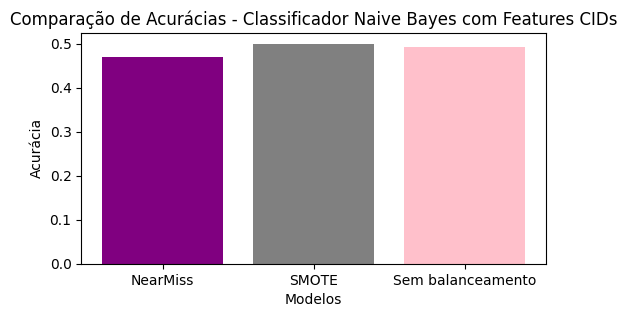

In [109]:
acuracias = [acuracia_ft_cids_cnb_miss, acuracia_ft_cids_cnb_smt, acuracia_ft_cids_cnb]
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

plt.figure(figsize=(6, 3))
plt.title('Comparação de Acurácias - Classificador Naive Bayes com Features CIDs')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.bar(modelos, acuracias, color=['purple', 'gray', 'pink'])

plt.show()

Como podemos notar, essa classificação obteve um resultado próximo com a classificação dos dados médicos anteriores. A acurácia foi menor, mas ainda sim é semelhante. Dessa forma, é possível concluir que o Naive Bayes não obteve um bom desempenho para a classificação desses dados.

# Árvore de Decisão

As árvores de decisões são populares e poderosas utilizadas em vários campos. Fornecem uma maneira clara e intuitiva de tomar decisões com base em dados, modelando as relações entre diferentes variáveis. É semelhante a um fluxograma usada para tomar decisões ou fazer previsões.
Elas são fáceis de interpretar, rápidas de treinar e podem lidar com tanto dados contínuos quanto categóricos.

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

### Sem Balancear - Features Médicas

O gridSearchCV é uma ferramenta utilizada para automatizar o processo de ajuste dos parâmetros de um algoritmo. O objetivo primário do GridSearchCV é a criação de modificações de parâmetros para posteriormente avaliá-las e retornar os melhores parâmetros a serem utilizados no algoritmo.

- max depth = Define a profundidade/tamanho máximo da árvore. Um valor maior aumenta a complexidade, mas pode levar ao overfitting e um valor menor previne o overfittin, mas pode causar o underfitting (modelo nao aprende bem)

- min_samples_split = Número mínimo de amostras necessárias para dividir um nó. Se um nó tiver menos amostras do que este valor, ele não será dividido.
 
- min_samples_leaf = Número mínimo de amostras que um nó folha pode ter. Garante que os nós finais (folhas) não sejam criados com pouquíssimas amostras.

- criterion = Define a métrica usada para avaliar a qualidade da divisão. Os critérios mais comuns são:
    - gini: Usa o índice de Gini, que mede a probabilidade de uma classificação incorreta de uma nova instância se ela for classificada aleatoriamente de acordo com a distribuição de classes no conjunto de dados
    - entropy: Usa a entropia (teoria da informação), que mede a incerteza ou impureza no conjunto de dados

In [111]:
from sklearn.model_selection import GridSearchCV

# Passando os parâmetros que a Arvore de Decisão aceitam
params = {
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=2)
grid.fit(X_train, y_train)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}


In [112]:
dtree1 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=2)
dtree1.fit(X_train, y_train)

pred_dtree1 = dtree1.predict(X_test)

In [113]:
acuracia_ft_X_dst = metrics.accuracy_score(y_test, pred_dtree1)
print("Features CIDS sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_X_dst *100).round(2))
print(metrics.classification_report(y_test, pred_dtree1))

Features CIDS sem balanceamento: 
Acurácia:  57.38
              precision    recall  f1-score   support

           0       0.55      0.74      0.63     22888
           8       0.69      0.43      0.53     15802
           9       0.54      0.31      0.40     22964
          17       0.58      0.70      0.63     34472

    accuracy                           0.57     96126
   macro avg       0.59      0.55      0.55     96126
weighted avg       0.58      0.57      0.56     96126



### SMOTE - Features Médicas

In [114]:
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

params = {
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=2)
grid.fit(X_train_smote, y_train_smote)
print("Melhores parâmetros:", grid.best_params_)


Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [115]:
dtree1 = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2)
dtree1.fit(X_train_smote, y_train_smote)

pred_dtree1 = dtree1.predict(X_test)

In [116]:
acuracia_ft_X_dst_smt = metrics.accuracy_score(y_test, pred_dtree1)
print("Features Médicas com SMOTE: ")
print('Acurácia: ', (acuracia_ft_X_dst_smt *100).round(2))
print(metrics.classification_report(y_test, pred_dtree1))

Features Médicas com SMOTE: 
Acurácia:  54.56
              precision    recall  f1-score   support

           0       0.54      0.71      0.61     22888
           8       0.47      0.74      0.57     15802
           9       0.47      0.44      0.46     22964
          17       0.73      0.42      0.53     34472

    accuracy                           0.55     96126
   macro avg       0.55      0.58      0.54     96126
weighted avg       0.58      0.55      0.54     96126



### NearMiss - Features Médicas

In [117]:
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)

params = {
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=2)
grid.fit(X_train_miss, y_train_miss)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}


In [118]:
dtree1 = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=10)
dtree1.fit(X_train_miss, y_train_miss)

pred_dtree1 = dtree1.predict(X_test)

In [119]:
acuracia_ft_X_dst_miss = metrics.accuracy_score(y_test, pred_dtree1)
print("Features CIDS com NearMiss: ")
print('Acurácia: ', (acuracia_ft_X_dst_miss *100).round(2))
print(metrics.classification_report(y_test, pred_dtree1))

Features CIDS com NearMiss: 
Acurácia:  52.29
              precision    recall  f1-score   support

           0       0.50      0.79      0.61     22888
           8       0.45      0.66      0.53     15802
           9       0.45      0.36      0.40     22964
          17       0.73      0.40      0.51     34472

    accuracy                           0.52     96126
   macro avg       0.53      0.55      0.51     96126
weighted avg       0.56      0.52      0.51     96126



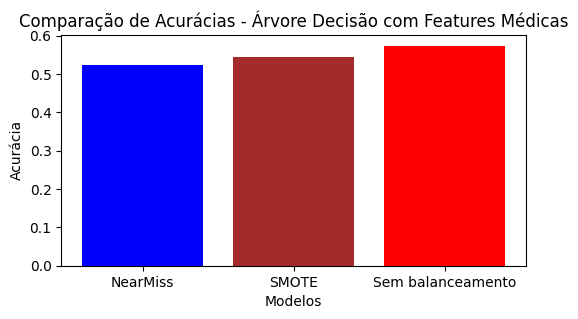

In [120]:
acuracias = [acuracia_ft_X_dst_miss, acuracia_ft_X_dst_smt, acuracia_ft_X_dst]
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

plt.figure(figsize=(6, 3))
plt.title('Comparação de Acurácias - Árvore Decisão com Features Médicas')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.bar(modelos, acuracias, color=['blue', 'brown', 'red'])

plt.show()

Com a árvore de decisão, obtive um resultado melhor que com o algoritmo de Naive Bayes, mas ainda assim baixo. O algoritmo conseguiu encontrar um padrão melhor entre as variáveis e classificá-las, mas a acurácia não foi satisfatória, indicando que existem desafios nos dados ou complexidade no modelo. Esse desempenho pode ser atribuído a vários fatores, como a qualidade das features selecionadas, a quantidade de dados disponíveis.

## Comparando Naive Bayes com a Árvore de Decisão

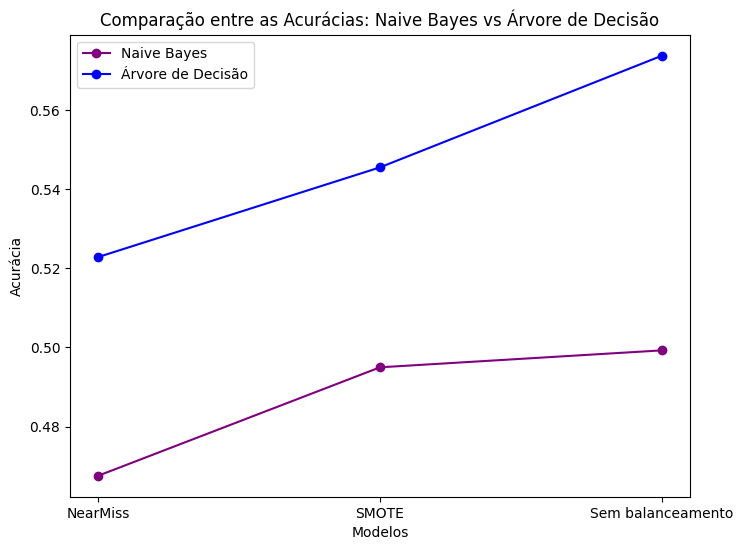

In [121]:

acuracias_nb = [acuracia_ft_medicas_cnb_miss, acuracia_ft_medicas_cnb_smt, acuracia_ft_medicas_cnb]
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

acuracias_arv = [acuracia_ft_X_dst_miss, acuracia_ft_X_dst_smt, acuracia_ft_X_dst]

plt.figure(figsize=(8, 6))

plt.plot(modelos, acuracias_nb, marker='o', label='Naive Bayes', color='purple', linestyle='-')
plt.plot(modelos, acuracias_arv, marker='o', label='Árvore de Decisão', color='blue', linestyle='-')

plt.title('Comparação entre as Acurácias: Naive Bayes vs Árvore de Decisão')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

A acurácia da Árvore de Decisão foi superior que Naive Bayes. Um fator que pode explicar esse comportamento é a robustez da árvore e a flexibilidade para capturar os padrões nos dados, uma vez que segmentam os atributos com base em critérios como gini e/ou entropia, enquanto o Naive Bayes, apesar da sua rápida implementação. é mais sensível ao desbalanceamento e assume independência entre as variáveis, o que limita o desempenho.

## Sem balancear - Features CID's

In [122]:
params = {
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=2)
grid.fit(X_train_cid, y_train_cid)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [123]:
dtree2 = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=2)
dtree2.fit(X_train_cid, y_train_cid)

pred_dtree2 = dtree2.predict(X_test_cid)

In [124]:
acuracia_ft_cid_dst = metrics.accuracy_score(y_test_cid, pred_dtree1)
print("Features CIDS sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_cid_dst *100).round(2))
print(metrics.classification_report(y_test_cid, pred_dtree2))

Features CIDS sem balanceamento: 
Acurácia:  52.29
              precision    recall  f1-score   support

           0       0.56      0.70      0.62     22888
           8       0.60      0.49      0.54     15802
           9       0.51      0.35      0.41     22964
          17       0.58      0.66      0.62     34472

    accuracy                           0.57     96126
   macro avg       0.56      0.55      0.55     96126
weighted avg       0.56      0.57      0.56     96126



## SMOTE - Features CID's

In [125]:
X_train_smote, y_train_smote = sm.fit_resample(X_train_cid, y_train_cid)

params = {
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=2)
grid.fit(X_train_smote, y_train_smote)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [126]:
dtree2 = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2)
dtree2.fit(X_train_smote, y_train_smote)

pred_dtree2 = dtree2.predict(X_test_cid)

In [127]:
acuracia_ft_cid_dst_smt = metrics.accuracy_score(y_test_cid, pred_dtree2)
print("Features CIDS com SMOTE: ")
print('Acurácia: ', (acuracia_ft_cid_dst_smt *100).round(2))
print(metrics.classification_report(y_test_cid, pred_dtree2))

Features CIDS com SMOTE: 
Acurácia:  53.84
              precision    recall  f1-score   support

           0       0.53      0.74      0.62     22888
           8       0.45      0.76      0.57     15802
           9       0.48      0.41      0.44     22964
          17       0.74      0.39      0.51     34472

    accuracy                           0.54     96126
   macro avg       0.55      0.58      0.53     96126
weighted avg       0.58      0.54      0.53     96126



## NearMiss - Features CID's

In [128]:
X_train_miss, y_train_miss = nr.fit_resample(X_train_cid, y_train_cid)

params = {
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=2)
grid.fit(X_train_miss, y_train_miss)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [129]:
dtree2 = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10, min_samples_split=2)
dtree2.fit(X_train_miss, y_train_miss)

pred_dtree2 = dtree2.predict(X_test_cid)

In [130]:
acuracia_ft_cid_dst_miss = metrics.accuracy_score(y_test_cid, pred_dtree2)
print("Features CIDS com NearMiss: ")
print('Acurácia: ', (acuracia_ft_cid_dst_miss *100).round(2))
print(metrics.classification_report(y_test_cid, pred_dtree2))

Features CIDS com NearMiss: 
Acurácia:  50.56
              precision    recall  f1-score   support

           0       0.48      0.78      0.60     22888
           8       0.42      0.76      0.54     15802
           9       0.43      0.28      0.34     22964
          17       0.77      0.36      0.49     34472

    accuracy                           0.51     96126
   macro avg       0.53      0.54      0.49     96126
weighted avg       0.56      0.51      0.49     96126



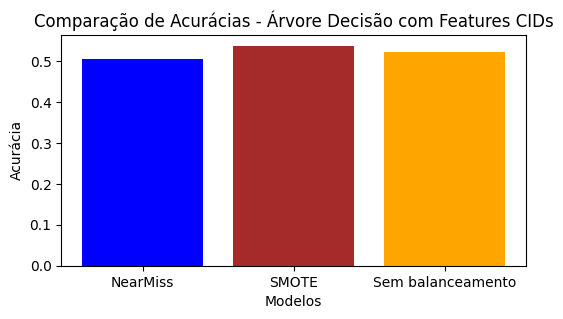

In [131]:
acuracias = [acuracia_ft_cid_dst_miss, acuracia_ft_cid_dst_smt, acuracia_ft_cid_dst]
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

plt.figure(figsize=(6, 3))
plt.title('Comparação de Acurácias - Árvore Decisão com Features CIDs')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.bar(modelos, acuracias, color=['blue', 'brown', 'orange'])

plt.show()

Nesses dados, os dados sem balanceamento saíram pior que os dados que realizaram o balanceamento, mas com pouca diferença entre as acurácias

### Gráfico comparativo: Features Médicas vs Features de CID's

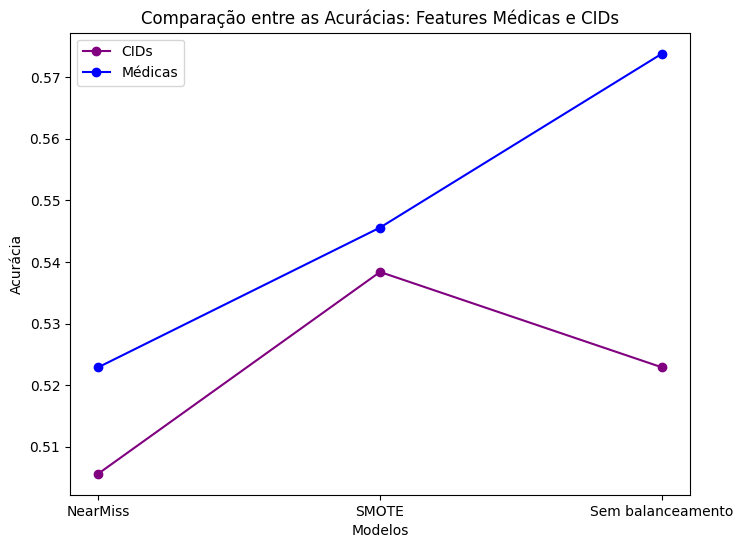

In [132]:

acuracias_cid = [acuracia_ft_cid_dst_miss, acuracia_ft_cid_dst_smt, acuracia_ft_cid_dst]
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

acuracias_medic = [acuracia_ft_X_dst_miss, acuracia_ft_X_dst_smt, acuracia_ft_X_dst]

plt.figure(figsize=(8, 6))

plt.plot(modelos, acuracias_cid, marker='o', label='CIDs', color='purple', linestyle='-')
plt.plot(modelos, acuracias_medic, marker='o', label='Médicas', color='blue', linestyle='-')

plt.title('Comparação entre as Acurácias: Features Médicas e CIDs')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

É possível notar que, com as features médicas gerais ('ASSISTMED', 'NECROPSIA', 'LINHAB', 'LINHAC', 'CAUSABAS', 'LINHAII') o modelo obteve um melhor desempenho do que com apenas features de CID's.

# Floresta Aleatória

Esse algoritmo subdivide em várias árvores e obtém um grupo aleatório, remontando em uma árvore e obtendo um resultado melhor, escolhendo o melhor resultado

### Sem Balancear - Features Médicas

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
params = {
    'n_estimators': [50],
    'max_depth': [5, 10, 15],  
    'min_samples_split': [10],  
    'min_samples_leaf': [5],  
    'criterion': ['entropy','gini'] 
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [135]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100)

In [136]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10)

In [137]:
pred_rfc = rfc.predict(X_test)

In [138]:
acuracia_ft_X_rfc = metrics.accuracy_score(y_test, pred_rfc)
print("Features CIDS com SMOTE: ")
print('Acurácia: ', (acuracia_ft_X_rfc *100).round(2))
print(metrics.classification_report(y_test, pred_rfc))

Features CIDS com SMOTE: 
Acurácia:  58.0
              precision    recall  f1-score   support

           0       0.56      0.73      0.63     22888
           8       0.65      0.48      0.55     15802
           9       0.53      0.35      0.42     22964
          17       0.59      0.68      0.63     34472

    accuracy                           0.58     96126
   macro avg       0.58      0.56      0.56     96126
weighted avg       0.58      0.58      0.57     96126



### SMOTE - Features Médicas

In [139]:
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

params = {
    'n_estimators': [50],
    'max_depth': [5, 10, 15],  
    'min_samples_split': [10],  
    'min_samples_leaf': [5],  
    'criterion': ['entropy','gini'] 
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train_smote, y_train_smote)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [140]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100)
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10)

In [141]:
pred_rfc = rfc.predict(X_test)

In [142]:
acuracia_ft_X_rfc_smt = metrics.accuracy_score(y_test, pred_rfc)
print("Features CIDS com SMOTE: ")
print('Acurácia: ', (acuracia_ft_X_rfc_smt *100).round(2))
print(metrics.classification_report(y_test, pred_rfc))

Features CIDS com SMOTE: 
Acurácia:  55.45
              precision    recall  f1-score   support

           0       0.54      0.75      0.63     22888
           8       0.48      0.74      0.58     15802
           9       0.49      0.44      0.46     22964
          17       0.75      0.41      0.53     34472

    accuracy                           0.55     96126
   macro avg       0.56      0.59      0.55     96126
weighted avg       0.59      0.55      0.55     96126



### NearMiss - Features Médicas

In [143]:
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)

params = {
    'n_estimators': [50],
    'max_depth': [5, 10, 15],  
    'min_samples_split': [10],  
    'min_samples_leaf': [5],  
    'criterion': ['entropy','gini'] 
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train_miss, y_train_miss)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [144]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100)
rfc.fit(X_train_miss, y_train_miss)

pred_rfc = rfc.predict(X_test)

In [145]:
acuracia_ft_X_rfc_miss = metrics.accuracy_score(y_test, pred_rfc)
print("Features CIDS com SMOTE: ")
print('Acurácia: ', (acuracia_ft_X_rfc_miss *100).round(2))
print(metrics.classification_report(y_test, pred_rfc))

Features CIDS com SMOTE: 
Acurácia:  50.13
              precision    recall  f1-score   support

           0       0.48      0.76      0.59     22888
           8       0.40      0.74      0.52     15802
           9       0.45      0.31      0.37     22964
          17       0.80      0.34      0.48     34472

    accuracy                           0.50     96126
   macro avg       0.53      0.54      0.49     96126
weighted avg       0.58      0.50      0.49     96126



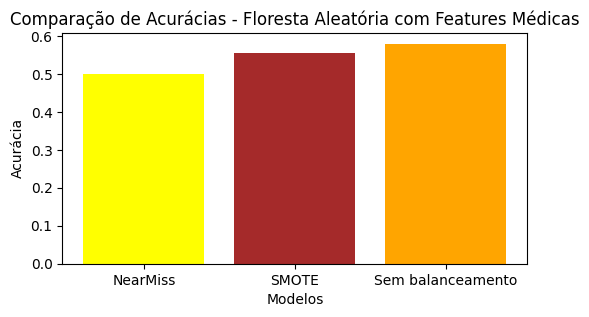

In [146]:
acuracias = [acuracia_ft_X_rfc_miss, acuracia_ft_X_rfc_smt, acuracia_ft_X_rfc]
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

plt.figure(figsize=(6, 3))
plt.title('Comparação de Acurácias - Floresta Aleatória com Features Médicas')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.bar(modelos, acuracias, color=['yellow', 'brown', 'orange'])

plt.show()

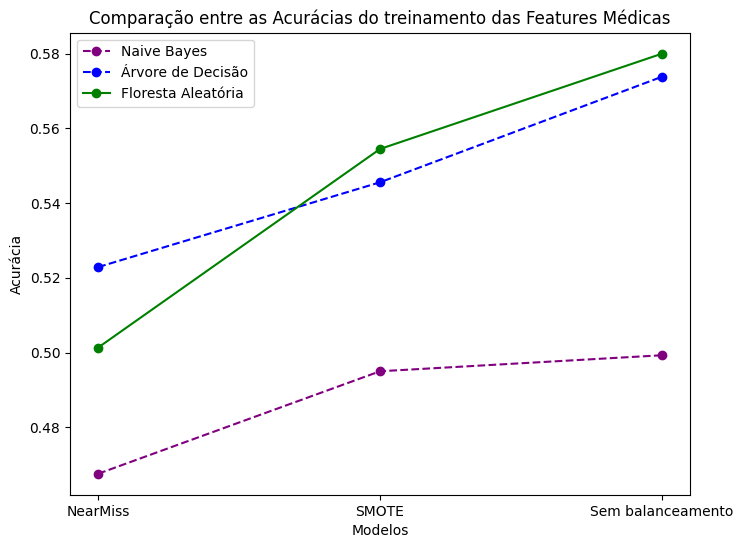

In [147]:
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

acuracias_nb = [acuracia_ft_medicas_cnb_miss, acuracia_ft_medicas_cnb_smt, acuracia_ft_medicas_cnb]
acuracias_arv = [acuracia_ft_X_dst_miss, acuracia_ft_X_dst_smt, acuracia_ft_X_dst]
acuracias_rfc = [acuracia_ft_X_rfc_miss, acuracia_ft_X_rfc_smt, acuracia_ft_X_rfc]

plt.figure(figsize=(8, 6))

plt.plot(modelos, acuracias_nb, marker='o', label='Naive Bayes', color='purple', linestyle='--')
plt.plot(modelos, acuracias_arv, marker='o', label='Árvore de Decisão', color='blue', linestyle='--')
plt.plot(modelos, acuracias_rfc, marker='o', label='Floresta Aleatória', color='green', linestyle='-')

plt.title('Comparação entre as Acurácias do treinamento das Features Médicas')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

A floresta aleatória teve um desempenho pouco melhor que os outros (Arvore de Decisão e Naive Bayes)

### Sem Balancear - Features CIDs

In [148]:
params = {
    'n_estimators': [50],
    'max_depth': [5, 10, 15],  
    'min_samples_split': [10],  
    'min_samples_leaf': [5],  
    'criterion': ['entropy','gini'] 
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train_cid, y_train_cid)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [149]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100)
rfc.fit(X_train_cid, y_train_cid)

pred_rfc = rfc.predict(X_test_cid)

In [150]:
acuracia_ft_Cid_rfc = metrics.accuracy_score(y_test_cid, pred_rfc)
print("Features CIDS sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_Cid_rfc *100).round(2))
print(metrics.classification_report(y_test_cid, pred_rfc))

Features CIDS sem balanceamento: 
Acurácia:  57.08
              precision    recall  f1-score   support

           0       0.56      0.71      0.63     22888
           8       0.61      0.48      0.54     15802
           9       0.53      0.34      0.41     22964
          17       0.58      0.67      0.62     34472

    accuracy                           0.57     96126
   macro avg       0.57      0.55      0.55     96126
weighted avg       0.57      0.57      0.56     96126



### SMOTE - Features CIDs

In [151]:
X_train_smt, y_train_smt = sm.fit_resample(X_train_cid, y_train_cid)

params = {
    'n_estimators': [50],
    'max_depth': [5, 10, 15],  
    'min_samples_split': [10],  
    'min_samples_leaf': [5],  
    'criterion': ['entropy'] 
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train_smt, y_train_smt)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [152]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100)
rfc.fit(X_train_smt, y_train_smt)

pred_rfc = rfc.predict(X_test_cid)

In [153]:
acuracia_ft_Cid_rfc_smt = metrics.accuracy_score(y_test_cid, pred_rfc)
print("Features CIDS com SMOTE: ")
print('Acurácia: ', (acuracia_ft_Cid_rfc_smt *100).round(2))
print(metrics.classification_report(y_test_cid, pred_rfc))

Features CIDS com SMOTE: 
Acurácia:  54.42
              precision    recall  f1-score   support

           0       0.54      0.76      0.63     22888
           8       0.46      0.76      0.57     15802
           9       0.48      0.41      0.44     22964
          17       0.74      0.39      0.51     34472

    accuracy                           0.54     96126
   macro avg       0.56      0.58      0.54     96126
weighted avg       0.58      0.54      0.53     96126



### NearMiss - Features CIDs

In [154]:
X_train_miss, y_train_miss = nr.fit_resample(X_train_cid, y_train_cid)

params = {
    'n_estimators': [50],
    'max_depth': [5, 10, 15],  
    'min_samples_split': [10],  
    'min_samples_leaf': [5],  
    'criterion': ['entropy'] 
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train_miss, y_train_miss)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [155]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100)
rfc.fit(X_train_miss, y_train_miss)

pred_rfc = rfc.predict(X_test_cid)

In [156]:
acuracia_ft_Cid_rfc_miss = metrics.accuracy_score(y_test_cid, pred_rfc)
print("Features CIDS com NearMiss: ")
print('Acurácia: ', (acuracia_ft_Cid_rfc_miss *100).round(2))
print(metrics.classification_report(y_test_cid, pred_rfc))

Features CIDS com NearMiss: 
Acurácia:  48.93
              precision    recall  f1-score   support

           0       0.48      0.76      0.59     22888
           8       0.40      0.79      0.53     15802
           9       0.41      0.28      0.33     22964
          17       0.83      0.31      0.46     34472

    accuracy                           0.49     96126
   macro avg       0.53      0.54      0.48     96126
weighted avg       0.58      0.49      0.47     96126



### Features Médicas vs Features CIDs

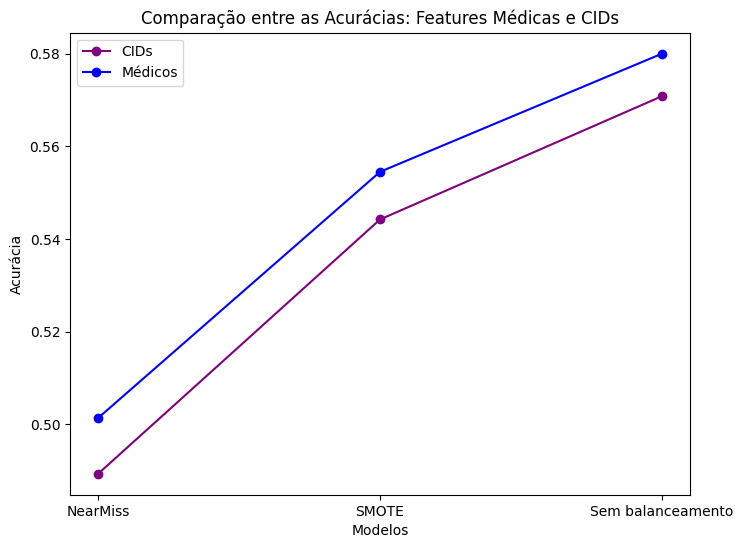

In [157]:
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

acuracias_medic = [acuracia_ft_X_rfc_miss, acuracia_ft_X_rfc_smt, acuracia_ft_X_rfc]
acuracias_cid = [acuracia_ft_Cid_rfc_miss, acuracia_ft_Cid_rfc_smt, acuracia_ft_Cid_rfc]

plt.figure(figsize=(8, 6))

plt.plot(modelos, acuracias_cid, marker='o', label='CIDs', color='purple', linestyle='-')
plt.plot(modelos, acuracias_medic, marker='o', label='Médicos', color='blue', linestyle='-')

plt.title('Comparação entre as Acurácias: Features Médicas e CIDs')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

Com esse gráfico, é possível observar que os dados Médicos obteve um desempenho superior aos dados de CID's, ou seja, o Random Florest Classifier conseguiu identificar melhores padrões nos dados que continham informações sobre questões médicas em geral.

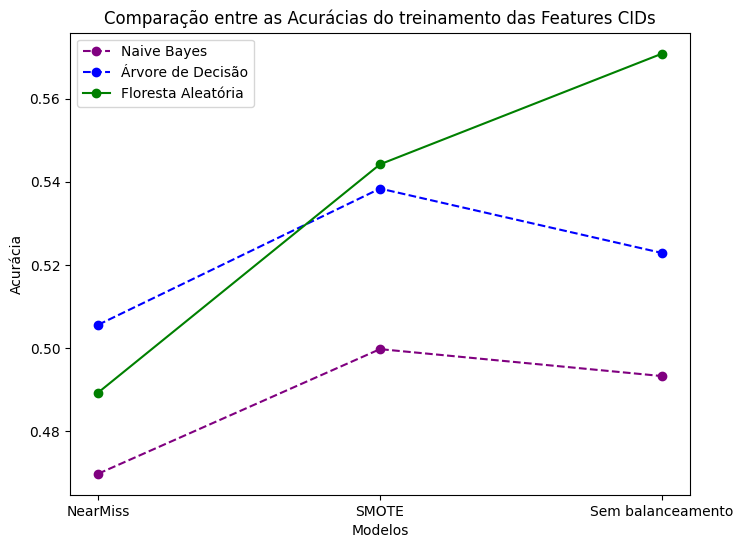

In [158]:
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

acuracias_nb = [acuracia_ft_cids_cnb_miss, acuracia_ft_cids_cnb_smt, acuracia_ft_cids_cnb]
acuracias_arv = [acuracia_ft_cid_dst_miss, acuracia_ft_cid_dst_smt, acuracia_ft_cid_dst]
acuracias_rfc = [acuracia_ft_Cid_rfc_miss, acuracia_ft_Cid_rfc_smt, acuracia_ft_Cid_rfc]

plt.figure(figsize=(8, 6))

plt.plot(modelos, acuracias_nb, marker='o', label='Naive Bayes', color='purple', linestyle='--')
plt.plot(modelos, acuracias_arv, marker='o', label='Árvore de Decisão', color='blue', linestyle='--')
plt.plot(modelos, acuracias_rfc, marker='o', label='Floresta Aleatória', color='green', linestyle='-')

plt.title('Comparação entre as Acurácias do treinamento das Features CIDs')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

Quando observado as colunas de CID's, o modelo que obteve um desempenho melhor foi a árvore de decisão

## Features Demográficas

In [185]:
X_train_smt, y_train_smt = sm.fit_resample(X_train_dem, y_train_dem)

arams = {
    'n_estimators': [50],
    'max_depth': [5, 10, 15],  
    'min_samples_split': [10],  
    'min_samples_leaf': [5],  
    'criterion': ['entropy'] 
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train_smt, y_train_smt)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [196]:
rfc = RandomForestClassifier(criterion='entropy',  max_depth=5,  min_samples_leaf=5, min_samples_split=10, n_estimators=50,  random_state=42)

rfc.fit(y_train_smt, y_train_smt)
pred_rfc = rfc.predict(X_test_dem)

acuracia_ft_X_rfc_dem_smt = metrics.accuracy_score(y_test_dem, pred_rfc)
print("Features Dem com SMOTE: ")
print('Acurácia: ', (acuracia_ft_X_rfc_dem * 100).round(2))
print(metrics.classification_report(y_test_dem, pred_rfc))

Features Dem com SMOTE: 
Acurácia:  28.63
              precision    recall  f1-score   support

           0       0.26      0.49      0.34     22888
           8       0.19      0.12      0.14     15802
           9       0.25      0.24      0.24     22964
          17       0.42      0.26      0.32     34472

    accuracy                           0.29     96126
   macro avg       0.28      0.28      0.26     96126
weighted avg       0.30      0.29      0.28     96126



In [198]:
X_train_miss, y_train_miss = nr.fit_resample(X_train_dem, y_train_dem)

arams = {
    'n_estimators': [50],
    'max_depth': [5, 10, 15],  
    'min_samples_split': [10],  
    'min_samples_leaf': [5],  
    'criterion': ['entropy'] 
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train_miss, y_train_miss)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [200]:
rfc = RandomForestClassifier(criterion='entropy',  max_depth=5,  min_samples_leaf=5, min_samples_split=10, n_estimators=50,  random_state=42)

rfc.fit(X_train_miss, y_train_miss)
pred_rfc = rfc.predict(X_test_dem)

acuracia_ft_X_rfc_dem_miss = metrics.accuracy_score(y_test_dem, pred_rfc)
print("Features Dem com NearMiss: ")
print('Acurácia: ', (acuracia_ft_X_rfc_dem_miss * 100).round(2))
print(metrics.classification_report(y_test_dem, pred_rfc))

Features Dem com NearMiss: 
Acurácia:  28.63
              precision    recall  f1-score   support

           0       0.26      0.55      0.35     22888
           8       0.19      0.12      0.15     15802
           9       0.25      0.17      0.20     22964
          17       0.41      0.27      0.33     34472

    accuracy                           0.29     96126
   macro avg       0.28      0.28      0.26     96126
weighted avg       0.30      0.29      0.27     96126



### Features Socioeconomicas

In [197]:
X_train_smt, y_train_smt = sm.fit_resample(X_train_soc, y_train_soc)

params = {
    'n_estimators': [50],
    'max_depth': [5, 10, 15],  
    'min_samples_split': [10],  
    'min_samples_leaf': [5],  
    'criterion': ['entropy'] 
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train_smt, y_train_smt)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [193]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=5,  min_samples_leaf=5, min_samples_split=10, n_estimators=50,  random_state=42)

rfc.fit(X_train_smt, y_train_smt)

pred_rfc = rfc.predict(X_test_soc)

acuracia_ft_X_rfc_soc = metrics.accuracy_score(y_test_soc, pred_rfc)
print("Features Soc com SMOTE: ")
print('Acurácia: ', (acuracia_ft_X_rfc_soc * 100).round(2))
print(metrics.classification_report(y_test_soc, pred_rfc))


Features Soc com SMOTE: 
Acurácia:  26.95
              precision    recall  f1-score   support

           0       0.26      0.45      0.33     22888
           8       0.18      0.31      0.23     15802
           9       0.25      0.11      0.15     22964
          17       0.41      0.24      0.30     34472

    accuracy                           0.27     96126
   macro avg       0.28      0.28      0.25     96126
weighted avg       0.30      0.27      0.26     96126



In [201]:
X_train_miss, y_train_miss = nr.fit_resample(X_train_soc, y_train_soc)

params = {
    'n_estimators': [50],
    'max_depth': [5, 10, 15],  
    'min_samples_split': [10],  
    'min_samples_leaf': [5],  
    'criterion': ['entropy'] 
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train_miss, y_train_miss)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [202]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=10,  min_samples_leaf=5, min_samples_split=10, n_estimators=50,  random_state=42)

rfc.fit(X_train_miss, y_train_miss)

pred_rfc = rfc.predict(X_test_soc)

acuracia_ft_X_rfc_soc = metrics.accuracy_score(y_test_soc, pred_rfc)
print("Features Soc com NearMiss: ")
print('Acurácia: ', (acuracia_ft_X_rfc_soc * 100).round(2))
print(metrics.classification_report(y_test_soc, pred_rfc))


Features Soc com NearMiss: 
Acurácia:  27.59
              precision    recall  f1-score   support

           0       0.26      0.35      0.30     22888
           8       0.19      0.25      0.21     15802
           9       0.26      0.25      0.26     22964
          17       0.40      0.25      0.31     34472

    accuracy                           0.28     96126
   macro avg       0.28      0.28      0.27     96126
weighted avg       0.30      0.28      0.28     96126



# AdaBoost

In [159]:
from sklearn.ensemble import AdaBoostClassifier

### Sem balancear - Features Médicas

In [160]:
shallow_decision_tree = DecisionTreeClassifier(max_depth=2)
ada = AdaBoostClassifier(estimator=shallow_decision_tree,
                            n_estimators=100,
                            random_state=42)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
acuracia_ft_X_ada = metrics.accuracy_score(y_test, y_pred)

print("Features Medicas sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_X_ada *100).round(2))
print(metrics.classification_report(y_test, y_pred))

Features Medicas sem balanceamento: 
Acurácia:  56.28
              precision    recall  f1-score   support

           0       0.56      0.63      0.60     22888
           8       0.57      0.55      0.56     15802
           9       0.50      0.42      0.45     22964
          17       0.59      0.62      0.61     34472

    accuracy                           0.56     96126
   macro avg       0.56      0.55      0.55     96126
weighted avg       0.56      0.56      0.56     96126



### SMOTE - Features Médicas

In [161]:
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)

shallow_decision_tree = DecisionTreeClassifier(max_depth=2)
ada = AdaBoostClassifier(estimator=shallow_decision_tree,
                            n_estimators=100,
                            random_state=42)
ada.fit(X_train_smt, y_train_smt)

y_pred = ada.predict(X_test)
acuracia_ft_X_ada_smt = metrics.accuracy_score(y_test, y_pred)

print("Features Medicas com Smote: ")
print('Acurácia: ', (acuracia_ft_X_ada_smt *100).round(2))
print(metrics.classification_report(y_test, y_pred))

Features Medicas com Smote: 
Acurácia:  54.25
              precision    recall  f1-score   support

           0       0.54      0.67      0.60     22888
           8       0.47      0.74      0.57     15802
           9       0.47      0.48      0.48     22964
          17       0.73      0.41      0.52     34472

    accuracy                           0.54     96126
   macro avg       0.55      0.57      0.54     96126
weighted avg       0.58      0.54      0.54     96126



### NearMiss - Features Médicas

In [162]:
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)

shallow_decision_tree = DecisionTreeClassifier(max_depth=2)
ada = AdaBoostClassifier(estimator=shallow_decision_tree,
                            n_estimators=100,
                            random_state=42)
ada.fit(X_train_miss, y_train_miss)

y_pred = ada.predict(X_test)
acuracia_ft_X_ada_miss = metrics.accuracy_score(y_test, y_pred)

print("Features Medicas com NearMiss: ")
print('Acurácia: ', (acuracia_ft_X_ada_miss *100).round(2))
print(metrics.classification_report(y_test, y_pred))

Features Medicas com NearMiss: 
Acurácia:  50.22
              precision    recall  f1-score   support

           0       0.50      0.66      0.57     22888
           8       0.39      0.71      0.50     15802
           9       0.47      0.41      0.44     22964
          17       0.74      0.36      0.49     34472

    accuracy                           0.50     96126
   macro avg       0.53      0.54      0.50     96126
weighted avg       0.56      0.50      0.50     96126



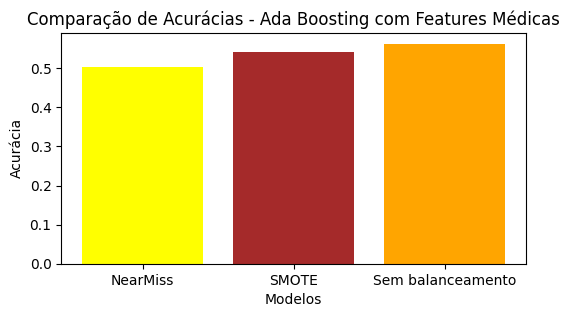

In [163]:
acuracias = [acuracia_ft_X_ada_miss, acuracia_ft_X_ada_smt, acuracia_ft_X_ada]
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

plt.figure(figsize=(6, 3))
plt.title('Comparação de Acurácias - AdaBoost com Features Médicas')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.bar(modelos, acuracias, color=['yellow', 'brown', 'orange'])

plt.show()

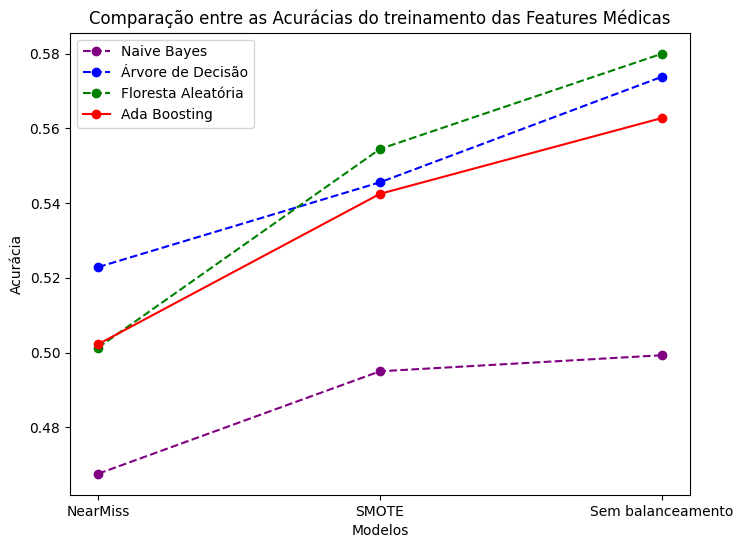

In [164]:
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

acuracias_nb = [acuracia_ft_medicas_cnb_miss, acuracia_ft_medicas_cnb_smt, acuracia_ft_medicas_cnb]
acuracias_arv = [acuracia_ft_X_dst_miss, acuracia_ft_X_dst_smt, acuracia_ft_X_dst]
acuracias_rfc = [acuracia_ft_X_rfc_miss, acuracia_ft_X_rfc_smt, acuracia_ft_X_rfc]
acuracias_ada = [acuracia_ft_X_ada_miss, acuracia_ft_X_ada_smt, acuracia_ft_X_ada]


plt.figure(figsize=(8, 6))

plt.plot(modelos, acuracias_nb, marker='o', label='Naive Bayes', color='purple', linestyle='--')
plt.plot(modelos, acuracias_arv, marker='o', label='Árvore de Decisão', color='blue', linestyle='--')
plt.plot(modelos, acuracias_rfc, marker='o', label='Floresta Aleatória', color='green', linestyle='--')
plt.plot(modelos, acuracias_ada, marker='o', label='AdaBoost', color='red', linestyle='-')


plt.title('Comparação entre as Acurácias do treinamento das Features Médicas')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

### Sem balancear - Features CID's

In [166]:
shallow_decision_tree = DecisionTreeClassifier(max_depth=2)
ada = AdaBoostClassifier(estimator=shallow_decision_tree,
                            n_estimators=100,
                            random_state=42)
ada.fit(X_train_cid, y_train_cid)

y_pred = ada.predict(X_test_cid)
acuracia_ft_cid_ada = metrics.accuracy_score(y_test_cid, y_pred)

print("Features Medicas sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_cid_ada *100).round(2))
print(metrics.classification_report(y_test_cid, y_pred))

Features Medicas sem balanceamento: 
Acurácia:  55.74
              precision    recall  f1-score   support

           0       0.57      0.64      0.60     22888
           8       0.56      0.54      0.55     15802
           9       0.49      0.41      0.45     22964
          17       0.58      0.61      0.60     34472

    accuracy                           0.56     96126
   macro avg       0.55      0.55      0.55     96126
weighted avg       0.55      0.56      0.55     96126



### SMOTE - Features CID's

In [167]:
X_train_smt, y_train_smt = sm.fit_resample(X_train_cid, y_train_cid)

shallow_decision_tree = DecisionTreeClassifier(max_depth=2)
ada = AdaBoostClassifier(estimator=shallow_decision_tree,
                            n_estimators=100,
                            random_state=42)
ada.fit(X_train_smt, y_train_smt)

y_pred = ada.predict(X_test_cid)
acuracia_ft_cid_ada_smt = metrics.accuracy_score(y_test_cid, y_pred)

print("Features Medicas com Smote: ")
print('Acurácia: ', (acuracia_ft_cid_ada_smt *100).round(2))
print(metrics.classification_report(y_test_cid, y_pred))

Features Medicas com Smote: 
Acurácia:  53.6
              precision    recall  f1-score   support

           0       0.55      0.65      0.59     22888
           8       0.46      0.76      0.57     15802
           9       0.46      0.49      0.48     22964
          17       0.74      0.39      0.51     34472

    accuracy                           0.54     96126
   macro avg       0.55      0.57      0.54     96126
weighted avg       0.58      0.54      0.53     96126



### NearMiss - Features CID's

In [168]:
X_train_miss, y_train_miss = nr.fit_resample(X_train_cid, y_train_cid)

shallow_decision_tree = DecisionTreeClassifier(max_depth=2)
ada = AdaBoostClassifier(estimator=shallow_decision_tree,
                            n_estimators=100,
                            random_state=42)
ada.fit(X_train_miss, y_train_miss)

y_pred = ada.predict(X_test_cid)
acuracia_ft_cid_ada_miss = metrics.accuracy_score(y_test_cid, y_pred)

print("Features Medicas com NearMiss: ")
print('Acurácia: ', (acuracia_ft_cid_ada_miss *100).round(2))
print(metrics.classification_report(y_test_cid, y_pred))

Features Medicas com NearMiss: 
Acurácia:  49.5
              precision    recall  f1-score   support

           0       0.50      0.75      0.60     22888
           8       0.39      0.77      0.51     15802
           9       0.45      0.28      0.34     22964
          17       0.76      0.34      0.47     34472

    accuracy                           0.49     96126
   macro avg       0.52      0.54      0.48     96126
weighted avg       0.56      0.49      0.48     96126



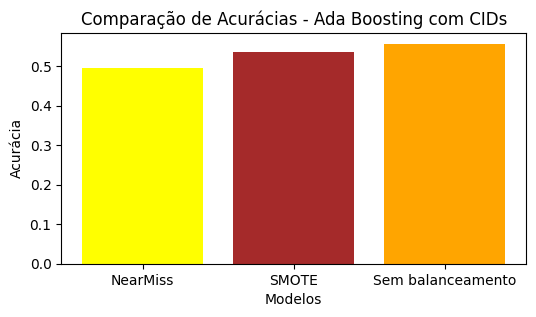

In [169]:
acuracias = [acuracia_ft_cid_ada_miss, acuracia_ft_cid_ada_smt, acuracia_ft_cid_ada]
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

plt.figure(figsize=(6, 3))
plt.title('Comparação de Acurácias - AdaBoost com CIDs')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.bar(modelos, acuracias, color=['yellow', 'brown', 'orange'])

plt.show()

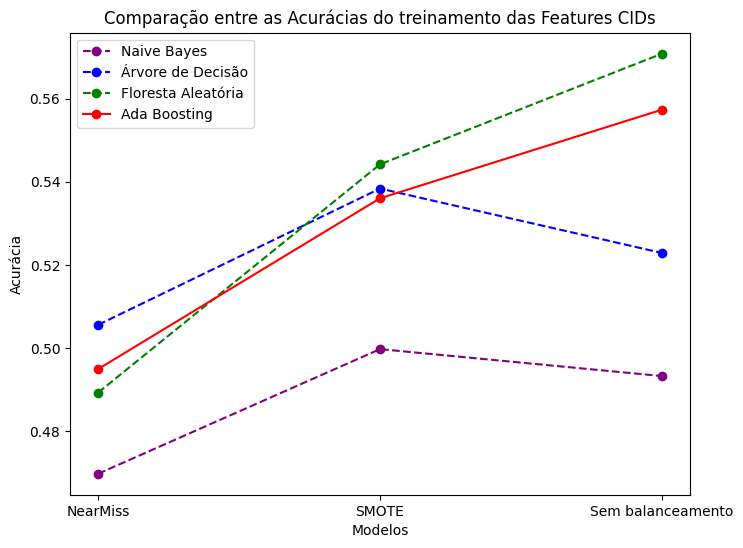

In [170]:
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

acuracias_nb = [acuracia_ft_cids_cnb_miss, acuracia_ft_cids_cnb_smt, acuracia_ft_cids_cnb]
acuracias_arv = [acuracia_ft_cid_dst_miss, acuracia_ft_cid_dst_smt, acuracia_ft_cid_dst]
acuracias_rfc = [acuracia_ft_Cid_rfc_miss, acuracia_ft_Cid_rfc_smt, acuracia_ft_Cid_rfc]
acuracias_ada = [acuracia_ft_cid_ada_miss, acuracia_ft_cid_ada_smt, acuracia_ft_cid_ada]

plt.figure(figsize=(8, 6))

plt.plot(modelos, acuracias_nb, marker='o', label='Naive Bayes', color='purple', linestyle='--')
plt.plot(modelos, acuracias_arv, marker='o', label='Árvore de Decisão', color='blue', linestyle='--')
plt.plot(modelos, acuracias_rfc, marker='o', label='Floresta Aleatória', color='green', linestyle='--')
plt.plot(modelos, acuracias_ada, marker='o', label='AdaBoost', color='red', linestyle='-')

plt.title('Comparação entre as Acurácias do treinamento das Features CIDs')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

O Ada boosting teve um desempenho inferior a floresta aleatoria

## Gradient Boosting

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

## Sem balancear - Features Médicas

In [172]:
gb = GradientBoostingClassifier(max_depth=5,  
                                 n_estimators=100, 
                                 random_state=42)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

acuracia_ft_X_gb = metrics.accuracy_score(y_test, y_pred)

print("Features Medicas sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_X_gb * 100).round(2))
print(metrics.classification_report(y_test, y_pred))

Features Medicas sem balanceamento: 
Acurácia:  57.87
              precision    recall  f1-score   support

           0       0.57      0.69      0.62     22888
           8       0.63      0.51      0.56     15802
           9       0.53      0.37      0.43     22964
          17       0.59      0.68      0.63     34472

    accuracy                           0.58     96126
   macro avg       0.58      0.56      0.56     96126
weighted avg       0.58      0.58      0.57     96126



## SMOTE - Features Médicas

In [173]:
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)

gb = GradientBoostingClassifier(max_depth=5,  
                                 n_estimators=100, 
                                 random_state=42)

gb.fit(X_train_smt, y_train_smt)

y_pred = gb.predict(X_test)

acuracia_ft_X_gb_smt = metrics.accuracy_score(y_test, y_pred)

print("Features Medicas sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_X_gb_smt * 100).round(2))
print(metrics.classification_report(y_test, y_pred))

Features Medicas sem balanceamento: 
Acurácia:  55.59
              precision    recall  f1-score   support

           0       0.54      0.75      0.63     22888
           8       0.48      0.74      0.58     15802
           9       0.49      0.43      0.46     22964
          17       0.73      0.43      0.54     34472

    accuracy                           0.56     96126
   macro avg       0.56      0.59      0.55     96126
weighted avg       0.59      0.56      0.55     96126



## NearMiss - Features Médicas

In [174]:
X_train_nr, y_train_nr = nr.fit_resample(X_train, y_train)

gb = GradientBoostingClassifier(max_depth=5,  
                                 n_estimators=100, 
                                 random_state=42)

gb.fit(X_train_nr, y_train_nr)

y_pred = gb.predict(X_test)

acuracia_ft_X_gb_nr = metrics.accuracy_score(y_test, y_pred)

print("Features Medicas sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_X_gb_nr * 100).round(2))
print(metrics.classification_report(y_test, y_pred))

Features Medicas sem balanceamento: 
Acurácia:  49.66
              precision    recall  f1-score   support

           0       0.50      0.71      0.59     22888
           8       0.37      0.70      0.48     15802
           9       0.48      0.38      0.43     22964
          17       0.73      0.34      0.46     34472

    accuracy                           0.50     96126
   macro avg       0.52      0.53      0.49     96126
weighted avg       0.56      0.50      0.49     96126



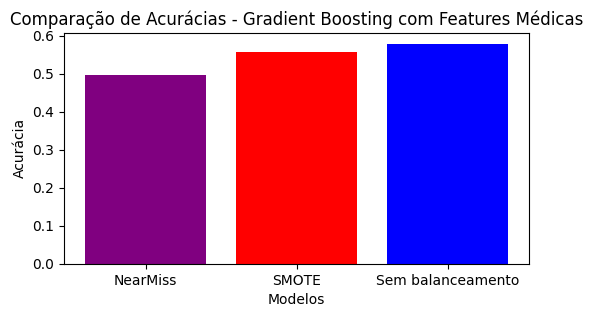

In [175]:
acuracias = [acuracia_ft_X_gb_nr, acuracia_ft_X_gb_smt, acuracia_ft_X_gb]
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

plt.figure(figsize=(6, 3))
plt.title('Comparação de Acurácias - Gradient Boosting com Features Médicas')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.bar(modelos, acuracias, color=['purple', 'red', 'blue'])

plt.show()

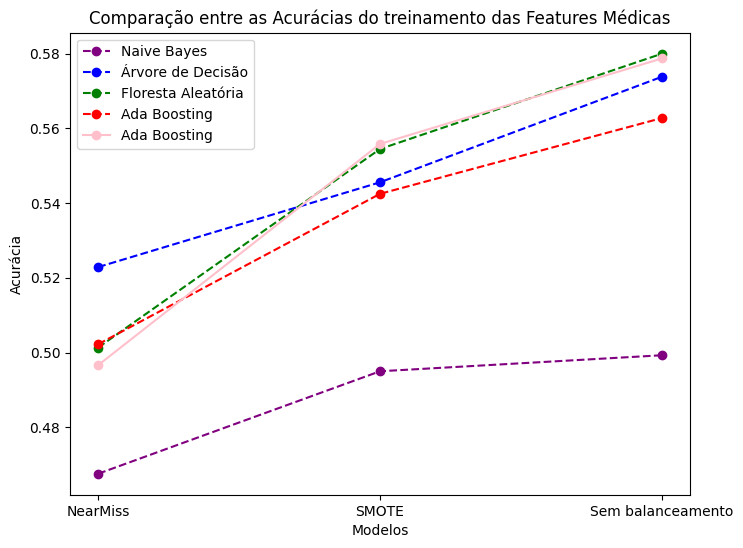

In [176]:
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

acuracias_nb = [acuracia_ft_medicas_cnb_miss, acuracia_ft_medicas_cnb_smt, acuracia_ft_medicas_cnb]
acuracias_arv = [acuracia_ft_X_dst_miss, acuracia_ft_X_dst_smt, acuracia_ft_X_dst]
acuracias_rfc = [acuracia_ft_X_rfc_miss, acuracia_ft_X_rfc_smt, acuracia_ft_X_rfc]
acuracias_ada = [acuracia_ft_X_ada_miss, acuracia_ft_X_ada_smt, acuracia_ft_X_ada]
acuracias_gb = [acuracia_ft_X_gb_nr, acuracia_ft_X_gb_smt, acuracia_ft_X_gb]


plt.figure(figsize=(8, 6))

plt.plot(modelos, acuracias_nb, marker='o', label='Naive Bayes', color='purple', linestyle='--')
plt.plot(modelos, acuracias_arv, marker='o', label='Árvore de Decisão', color='blue', linestyle='--')
plt.plot(modelos, acuracias_rfc, marker='o', label='Floresta Aleatória', color='green', linestyle='--')
plt.plot(modelos, acuracias_ada, marker='o', label='AdaBoost', color='red', linestyle='--')
plt.plot(modelos, acuracias_gb, marker='o', label='Gradient Boosting', color='pink', linestyle='-')


plt.title('Comparação entre as Acurácias do treinamento das Features Médicas')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

### Sem balancear - Features CID's

In [177]:
gb = GradientBoostingClassifier(max_depth=5,  
                                 n_estimators=100, 
                                 random_state=42)

gb.fit(X_train_cid, y_train_cid)

y_pred = gb.predict(X_test_cid)

acuracia_ft_cid_gb = metrics.accuracy_score(y_test_cid, y_pred)

print("Features Medicas sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_cid_gb * 100).round(2))
print(metrics.classification_report(y_test_cid, y_pred))

Features Medicas sem balanceamento: 
Acurácia:  56.9
              precision    recall  f1-score   support

           0       0.57      0.66      0.61     22888
           8       0.61      0.48      0.54     15802
           9       0.52      0.38      0.44     22964
          17       0.58      0.68      0.62     34472

    accuracy                           0.57     96126
   macro avg       0.57      0.55      0.55     96126
weighted avg       0.57      0.57      0.56     96126



### SMOTE - Features CID's

In [178]:
X_train_smt, y_train_smt = nr.fit_resample(X_train_cid, y_train_cid)

gb = GradientBoostingClassifier(max_depth=5,  
                                 n_estimators=100, 
                                 random_state=42)

gb.fit(X_train_smt, y_train_smt)

y_pred = gb.predict(X_test_cid)

acuracia_ft_cid_gb_smt = metrics.accuracy_score(y_test_cid, y_pred)

print("Features Medicas sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_cid_gb_smt * 100).round(2))
print(metrics.classification_report(y_test_cid, y_pred))

Features Medicas sem balanceamento: 
Acurácia:  50.14
              precision    recall  f1-score   support

           0       0.50      0.72      0.59     22888
           8       0.38      0.78      0.51     15802
           9       0.47      0.34      0.40     22964
          17       0.79      0.33      0.47     34472

    accuracy                           0.50     96126
   macro avg       0.54      0.54      0.49     96126
weighted avg       0.58      0.50      0.49     96126



### NearMiss- Features CID's

In [179]:
X_train_nr, y_train_nr = nr.fit_resample(X_train_cid, y_train_cid)

gb = GradientBoostingClassifier(max_depth=5,  
                                 n_estimators=100, 
                                 random_state=42)

gb.fit(X_train_cid, y_train_cid)

y_pred = gb.predict(X_test_cid)

acuracia_ft_cid_gb_nr = metrics.accuracy_score(y_test_cid, y_pred)

print("Features Medicas sem balanceamento: ")
print('Acurácia: ', (acuracia_ft_cid_gb_nr * 100).round(2))
print(metrics.classification_report(y_test_cid, y_pred))

Features Medicas sem balanceamento: 
Acurácia:  56.9
              precision    recall  f1-score   support

           0       0.57      0.66      0.61     22888
           8       0.61      0.48      0.54     15802
           9       0.52      0.38      0.44     22964
          17       0.58      0.68      0.62     34472

    accuracy                           0.57     96126
   macro avg       0.57      0.55      0.55     96126
weighted avg       0.57      0.57      0.56     96126



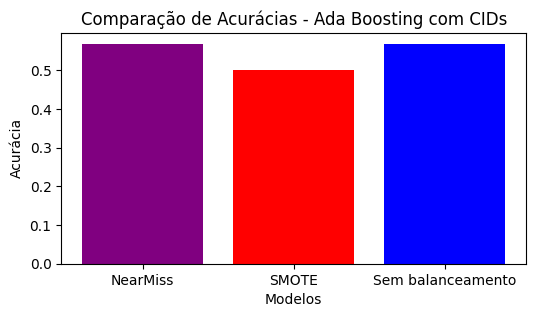

In [180]:
acuracias = [acuracia_ft_cid_gb_nr, acuracia_ft_cid_gb_smt, acuracia_ft_cid_gb]
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

plt.figure(figsize=(6, 3))
plt.title('Comparação de Acurácias - Ada Boosting com CIDs')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.bar(modelos, acuracias, color=['purple', 'red', 'blue'])

plt.show()

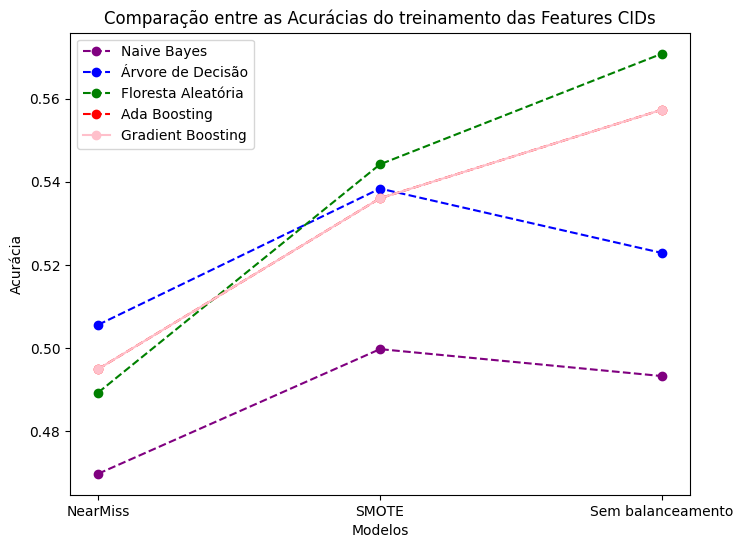

In [181]:
modelos = ['NearMiss', 'SMOTE', 'Sem balanceamento']

acuracias_nb = [acuracia_ft_cids_cnb_miss, acuracia_ft_cids_cnb_smt, acuracia_ft_cids_cnb]
acuracias_arv = [acuracia_ft_cid_dst_miss, acuracia_ft_cid_dst_smt, acuracia_ft_cid_dst]
acuracias_rfc = [acuracia_ft_Cid_rfc_miss, acuracia_ft_Cid_rfc_smt, acuracia_ft_Cid_rfc]
acuracias_ada = [acuracia_ft_cid_ada_miss, acuracia_ft_cid_ada_smt, acuracia_ft_cid_ada]
acuracias_gb = [acuracia_ft_cid_gb_nr, acuracia_ft_cid_gb_smt, acuracia_ft_cid_gb]


plt.figure(figsize=(8, 6))

plt.plot(modelos, acuracias_nb, marker='o', label='Naive Bayes', color='purple', linestyle='--')
plt.plot(modelos, acuracias_arv, marker='o', label='Árvore de Decisão', color='blue', linestyle='--')
plt.plot(modelos, acuracias_rfc, marker='o', label='Floresta Aleatória', color='green', linestyle='--')
plt.plot(modelos, acuracias_ada, marker='o', label='Ada Boosting', color='red', linestyle='--')
plt.plot(modelos, acuracias_ada, marker='o', label='Gradient Boosting', color='pink', linestyle='-')


plt.title('Comparação entre as Acurácias do treinamento das Features CIDs')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.legend()

plt.show()